In [174]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import SGD, Adagrad, RMSprop
from keras import regularizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from matplotlib import pyplot as plt

# Problem 1

In [178]:
class My_Callback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.L2=[]
        return
 
    def on_batch_end(self, batch, logs={}):
        weights = self.model.get_weights()
        temp = 0
        for i in [0,2,4]:
            temp += np.linalg.norm(weights[i], ord = 'fro')**2
        self.L2.append(temp)
        return

## early stopping and weight decay - no L2

In [192]:
batch_size = 64
num_classes = 10
epochs = 100
lr = 0.02


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(800, activation='relu', kernel_initializer='glorot_normal', input_shape=(28*28,)))
model.add(Dense(800, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr = lr),
              metrics=['accuracy'])

callback_1 = My_Callback()

history_1 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks = [callback_1])

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 784)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 20s 332us/step - loss: 0.5830 - acc: 0.8596 - val_loss: 0.3072 - val_acc: 0.9142
Epoch 2/100
60000/60000 [==============================] - 20s 327us/step - loss: 0.2753 - acc: 0.9218 - val_loss: 0.2430 - val_acc: 0.9278
Epoch 3/100
60000/60000 [==============================] - 19s 312us/step - loss: 0.2232 - acc: 0.9369 - val_loss: 0.1937 - val_acc: 0.9436
Epoch 4/100
60000/60000 [==============================] - 19s 317us/step - loss: 0.1884 - acc: 0.9469 - val_loss: 0.1712 - val_acc: 0.9507
Epoch 5/100
60000/60000 [==============================] - 19s 317us/step - loss: 0.1628 - acc: 0.9536 - val_loss: 0.1514 - val_acc: 0.9554
Epoch 6/100
60000/60000 [==============================] - 19s 320us/step - loss: 0.1427 - acc: 0.9597 - val_loss: 0.1388 - val_acc: 0.9591
Epoch 7/100
60000/60000 [==================

60000/60000 [==============================] - 20s 330us/step - loss: 0.0053 - acc: 0.9997 - val_loss: 0.0622 - val_acc: 0.9818
Epoch 59/100
60000/60000 [==============================] - 19s 320us/step - loss: 0.0051 - acc: 0.9997 - val_loss: 0.0624 - val_acc: 0.9815
Epoch 60/100
60000/60000 [==============================] - 19s 315us/step - loss: 0.0049 - acc: 0.9998 - val_loss: 0.0627 - val_acc: 0.9820
Epoch 61/100
60000/60000 [==============================] - 19s 322us/step - loss: 0.0047 - acc: 0.9998 - val_loss: 0.0629 - val_acc: 0.9817
Epoch 62/100
60000/60000 [==============================] - 19s 312us/step - loss: 0.0046 - acc: 0.9998 - val_loss: 0.0635 - val_acc: 0.9819
Epoch 63/100
60000/60000 [==============================] - 20s 325us/step - loss: 0.0044 - acc: 0.9999 - val_loss: 0.0625 - val_acc: 0.9821
Epoch 64/100
60000/60000 [==============================] - 19s 322us/step - loss: 0.0042 - acc: 0.9999 - val_loss: 0.0631 - val_acc: 0.9818
Epoch 65/100
60000/60000 [

## early stopping and weight decay - L2

In [193]:
batch_size = 64
num_classes = 10
epochs = 100
lr = 0.02
#In keras, L2 regularization comes without the 1/2. We need to include it into the lambda
_lambda = 0.5*2.5*batch_size/60000

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(800, activation='relu', kernel_initializer='glorot_normal', 
                kernel_regularizer=keras.regularizers.l2(_lambda),
                input_shape=(28*28,)))
model.add(Dense(800, activation='relu', kernel_initializer='glorot_normal',
               kernel_regularizer=keras.regularizers.l2(_lambda),))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr = lr),
              metrics=['accuracy'])


callback_2 = My_Callback()

history_2 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks = [callback_2])

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 784)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 28s 464us/step - loss: 2.1721 - acc: 0.8547 - val_loss: 1.8165 - val_acc: 0.9148
Epoch 2/100
60000/60000 [==============================] - 27s 446us/step - loss: 1.7307 - acc: 0.9190 - val_loss: 1.6304 - val_acc: 0.9281
Epoch 3/100
60000/60000 [==============================] - 27s 445us/step - loss: 1.5532 - acc: 0.9342 - val_loss: 1.4690 - val_acc: 0.9398
Epoch 4/100
60000/60000 [==============================] - 26s 428us/step - loss: 1.4046 - acc: 0.9436 - val_loss: 1.3353 - val_acc: 0.9438
Epoch 5/100
60000/60000 [==============================] - 25s 421us/step - loss: 1.2750 - acc: 0.9503 - val_loss: 1.2146 - val_acc: 0.9524
Epoch 6/100
60000/60000 [==============================] - 30s 498us/step - loss: 1.1605 - acc: 0.9551 - val_loss: 1.1074 - val_acc: 0.9556
Epoch 7/100
60000/60000 [==================

60000/60000 [==============================] - 25s 418us/step - loss: 0.1138 - acc: 0.9921 - val_loss: 0.1396 - val_acc: 0.9802
Epoch 59/100
60000/60000 [==============================] - 24s 408us/step - loss: 0.1126 - acc: 0.9922 - val_loss: 0.1379 - val_acc: 0.9808
Epoch 60/100
60000/60000 [==============================] - 24s 398us/step - loss: 0.1116 - acc: 0.9921 - val_loss: 0.1356 - val_acc: 0.9823
Epoch 61/100
60000/60000 [==============================] - 25s 411us/step - loss: 0.1107 - acc: 0.9921 - val_loss: 0.1374 - val_acc: 0.9798
Epoch 62/100
60000/60000 [==============================] - 24s 398us/step - loss: 0.1096 - acc: 0.9922 - val_loss: 0.1338 - val_acc: 0.9816
Epoch 63/100
60000/60000 [==============================] - 24s 407us/step - loss: 0.1090 - acc: 0.9926 - val_loss: 0.1330 - val_acc: 0.9810
Epoch 64/100
60000/60000 [==============================] - 24s 404us/step - loss: 0.1081 - acc: 0.9923 - val_loss: 0.1365 - val_acc: 0.9804
Epoch 65/100
60000/60000 [

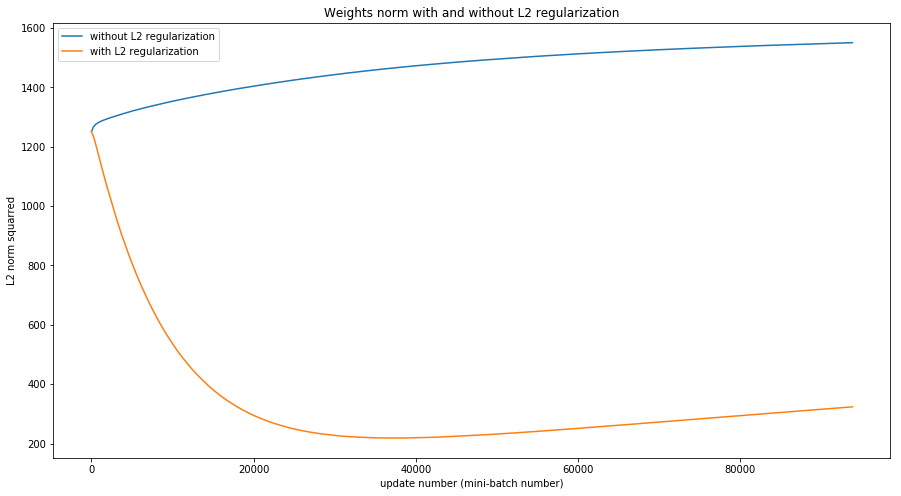

In [194]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(callback_1.L2, label = 'without L2 regularization')
plt.plot(callback_2.L2, label = "with L2 regularization")
plt.legend()
plt.xlabel("update number (mini-batch number)")
plt.ylabel("L2 norm squarred")
plt.title("Weights norm with and without L2 regularization")
plt.show()

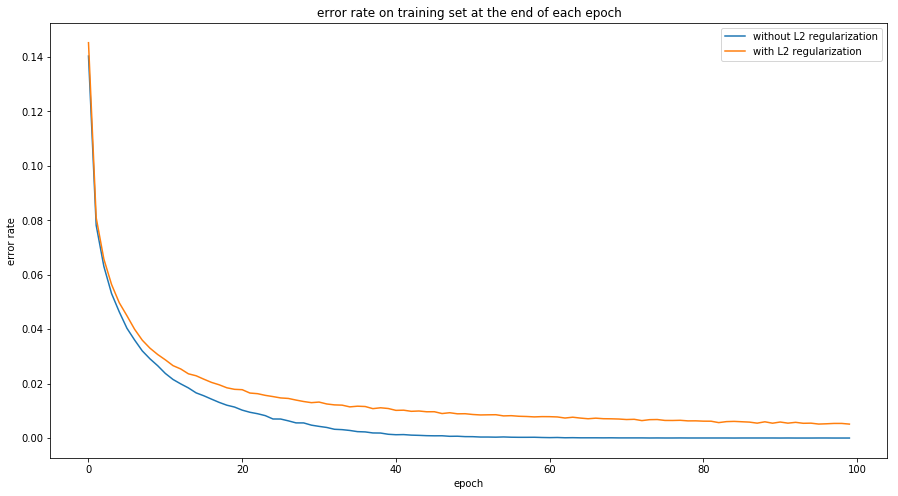

In [195]:
plt.figure(figsize=(15,8))
plt.plot([1-history_1.history["acc"][i] for i in range(len(history_1.history["acc"]))], label = 'without L2 regularization')
plt.plot([1-history_2.history["acc"][i] for i in range(len(history_1.history["acc"]))], label = "with L2 regularization")
plt.legend()
plt.xlabel('epoch')
plt.ylabel("error rate")
plt.title('error rate on training set at the end of each epoch')
plt.show()

## Dropout

### model training

In [180]:
batch_size = 64
num_classes = 10
epochs = 100
lr = 0.02


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(800, activation='relu', kernel_initializer='glorot_normal', input_shape=(28*28,)))
model.add(Dense(800, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr = lr),
              metrics=['accuracy'])


history_1 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 784)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 17s 275us/step - loss: 0.6296 - acc: 0.8289 - val_loss: 0.3004 - val_acc: 0.9156
Epoch 2/100
60000/60000 [==============================] - 17s 278us/step - loss: 0.3069 - acc: 0.9125 - val_loss: 0.2320 - val_acc: 0.9346
Epoch 3/100
60000/60000 [==============================] - 16s 265us/step - loss: 0.2449 - acc: 0.9290 - val_loss: 0.1948 - val_acc: 0.9436
Epoch 4/100
60000/60000 [==============================] - 17s 278us/step - loss: 0.2083 - acc: 0.9400 - val_loss: 0.1770 - val_acc: 0.9471
Epoch 5/100
60000/60000 [==============================] - 17s 280us/step - loss: 0.1832 - acc: 0.9480 - val_loss: 0.1534 - val_acc: 0.9536
Epoch 6/100
60000/60000 [==============================] - 16s 268us/step - loss: 0.1632 - acc: 0.9528 - val_loss: 0.1403 - val_acc: 0.9584
Epoch 7/100
60000/60000 [==================

60000/60000 [==============================] - 17s 287us/step - loss: 0.0122 - acc: 0.9975 - val_loss: 0.0573 - val_acc: 0.9823
Epoch 59/100
60000/60000 [==============================] - 18s 300us/step - loss: 0.0117 - acc: 0.9979 - val_loss: 0.0566 - val_acc: 0.9819
Epoch 60/100
60000/60000 [==============================] - 17s 288us/step - loss: 0.0118 - acc: 0.9974 - val_loss: 0.0558 - val_acc: 0.9821
Epoch 61/100
60000/60000 [==============================] - 18s 295us/step - loss: 0.0110 - acc: 0.9979 - val_loss: 0.0561 - val_acc: 0.9822
Epoch 62/100
60000/60000 [==============================] - 17s 281us/step - loss: 0.0107 - acc: 0.9977 - val_loss: 0.0554 - val_acc: 0.9827
Epoch 63/100
60000/60000 [==============================] - 17s 281us/step - loss: 0.0103 - acc: 0.9984 - val_loss: 0.0567 - val_acc: 0.9821
Epoch 64/100
60000/60000 [==============================] - 17s 282us/step - loss: 0.0101 - acc: 0.9981 - val_loss: 0.0564 - val_acc: 0.9826
Epoch 65/100
60000/60000 [

### multypling by 0.5

In [187]:
score_1 = model.evaluate(x_test,y_test,verbose=0)
print(score_1[1])

0.9824


### N dropout masks, averaging pre-softmax values

In [183]:
model_2 = Sequential()
model_2.add(Dense(800, activation='relu', kernel_initializer='glorot_normal', input_shape=(28*28,)))
model_2.add(Dense(800, activation='relu', kernel_initializer='glorot_normal'))
#we switched this layer with the classic keras dropout one 
#this new layer still performs dropout in any forward pass, not just during training
#With this, we can emulate a dropout mask sampling with every forward pass
model_2.add(Lambda(lambda x: K.dropout(x, level=0.5)))
model_2.add(Dense(num_classes, activation='linear'))

for i in range(len(model_2.layers)):
    model_2.layers[i].set_weights(model.layers[i].get_weights())

model_2.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr = lr),
              metrics=['accuracy'])

In [188]:
N = [i*10 for i in range(1,11)]
accuracy_2 = []

def predict_2(model,x_test,n):
    temp = np.zeros(y_test.shape)
    for i in range(n):
        temp += model.predict(x_test,verbose=0)
    return temp/n

def softmax(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis] 
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] 
    return e_x / div

for n in N:
    pre_softmax = predict_2(model_2,x_test,n)
    post_softmax = softmax(pre_softmax)
    
    predict = np.argmax(post_softmax,axis = 1)
    target = np.argmax(y_test,axis = 1)
    
    temp = predict-target
    
    counter = 0
    for i in range(len(temp)):
        if temp[i] == 0:
            counter += 1
    
    accuracy_2 += [float(counter)/len(temp)]

### N dropout masks, averaging predictions

In [189]:
model_3 = Sequential()
model_3.add(Dense(800, activation='relu', kernel_initializer='glorot_normal', input_shape=(28*28,)))
model_3.add(Dense(800, activation='relu', kernel_initializer='glorot_normal'))
#we switched this layer with the classic keras dropout one 
#this new layer still performs dropout in any forward pass, not just during training
#With this, we can emulate a dropout mask sampling with every forward pass
model_3.add(Lambda(lambda x: K.dropout(x, level=0.5)))
model_3.add(Dense(num_classes, activation='softmax'))

for i in range(len(model_3.layers)):
    model_3.layers[i].set_weights(model.layers[i].get_weights())

model_3.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr = lr),
              metrics=['accuracy'])

In [190]:
N = [i*10 for i in range(1,11)]
accuracy_3 = []

for n in N :
    temp = np.zeros(y_test.shape)
    for i in range(n):
        temp += model_3.predict(x_test,verbose=0)
    temp /= n   #average of the softmax from the N sampled dropout masks

    predict = np.argmax(temp, axis = 1)
    target = np.argmax(y_test,axis = 1)
    
    difference = predict - target
    
    counter = 0
    for i in range(len(difference)):
        if difference[i] == 0:
            counter += 1
    
    accuracy_3 += [float(counter)/len(temp)]

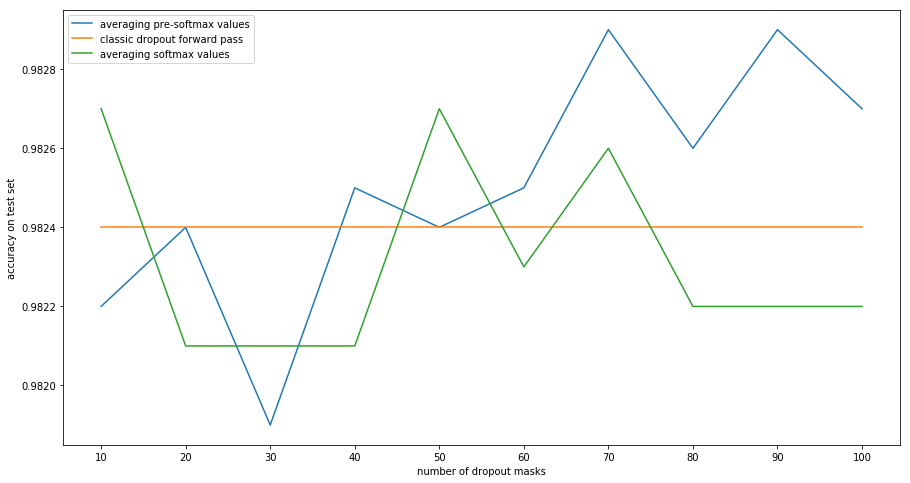

In [191]:
temp = []
for i in range(len(accuracy_2)):
    temp += [score_1[1]]

abcisse = [10,20,30,40,50,60,70,80,90,100]
plt.figure(figsize=(15,8))
plt.plot(abcisse,accuracy_2,label='averaging pre-softmax values')
plt.plot(abcisse,temp,label='classic dropout forward pass')
plt.plot(abcisse,accuracy_3,label='averaging softmax values')
plt.xlabel('number of dropout masks')
plt.ylabel('accuracy on test set')
plt.legend()
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.show()


- The first method is the same as taking the geometric mean over all dropout masks configurations possible (cf theoretical part).
- 
- The third is taking the arithmetic mean of the prediction from the N sub-netzorks corresponding to the N dropout masks.

### CNN - batch normalization

In [8]:
batch_size = 64
num_classes = 10
epochs = 10
lr = 1e-4

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_cnn = Sequential()

#layer 1
model_cnn.add(BatchNormalization(input_shape=input_shape))
model_cnn.add(Conv2D(16,(3,3),padding='same'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#layer 2
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(32,(3,3),padding='same'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#layer 3
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(64,(3,3),padding='same'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#layer 4
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(128,(3,3),padding='same'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#classification layer
model_cnn.add(BatchNormalization())
model_cnn.add(Flatten())
model_cnn.add(Dense(num_classes, activation = 'softmax'))

model_cnn.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adam(lr=lr),
              metrics=['accuracy'])

history_1 = model_cnn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model_cnn.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 106s 2ms/step - loss: 1.3446 - acc: 0.5564 - val_loss: 2.6613 - val_acc: 0.1160
Epoch 2/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.4966 - acc: 0.8433 - val_loss: 2.0450 - val_acc: 0.2168
Epoch 3/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.3391 - acc: 0.8935 - val_loss: 1.8020 - val_acc: 0.3151
Epoch 4/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2665 - acc: 0.9182 - val_loss: 1.5944 - val_acc: 0.3740
Epoch 5/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.2208 - acc: 0.9335 - val_loss: 1.4817 - val_acc: 0.4130
Epoch 6/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.1931 - acc: 0.9408 - val_loss: 1.3403 - val_acc: 0.4806
Epoch 7/10
60000/60000 [=========================

### CNN - without batch normalization

In [3]:
batch_size = 64
num_classes = 10
epochs = 10
lr = 1e-4

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_cnn2 = Sequential()

#layer 1
model_cnn2.add(Conv2D(16,(3,3),padding='same', input_shape=input_shape))
model_cnn2.add(Dropout(0.5))
model_cnn2.add(Activation('relu'))
model_cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#layer 2
model_cnn2.add(Conv2D(32,(3,3),padding='same'))
model_cnn2.add(Dropout(0.5))
model_cnn2.add(Activation('relu'))
model_cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#layer 3
model_cnn2.add(Conv2D(64,(3,3),padding='same'))
model_cnn2.add(Dropout(0.5))
model_cnn2.add(Activation('relu'))
model_cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#layer 4
model_cnn2.add(Conv2D(128,(3,3),padding='same'))
model_cnn2.add(Dropout(0.5))
model_cnn2.add(Activation('relu'))
model_cnn2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#classification layer
model_cnn2.add(Flatten())
model_cnn2.add(Dense(num_classes, activation = 'softmax'))

model_cnn2.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adam(lr=lr),
              metrics=['accuracy'])

history_2 = model_cnn2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score2 = model_cnn2.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 81s 1ms/step - loss: 1.0908 - acc: 0.6274 - val_loss: 1.1907 - val_acc: 0.9181
Epoch 2/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.4098 - acc: 0.8702 - val_loss: 1.0032 - val_acc: 0.9480
Epoch 3/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.3008 - acc: 0.9068 - val_loss: 0.8540 - val_acc: 0.9618
Epoch 4/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2491 - acc: 0.9228 - val_loss: 0.8066 - val_acc: 0.9683
Epoch 5/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2135 - acc: 0.9333 - val_loss: 0.7275 - val_acc: 0.9734
Epoch 6/10
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1929 - acc: 0.9411 - val_loss: 0.7229 - val_acc: 0.9756
Epoch 7/10
60000/60000 [==============================]

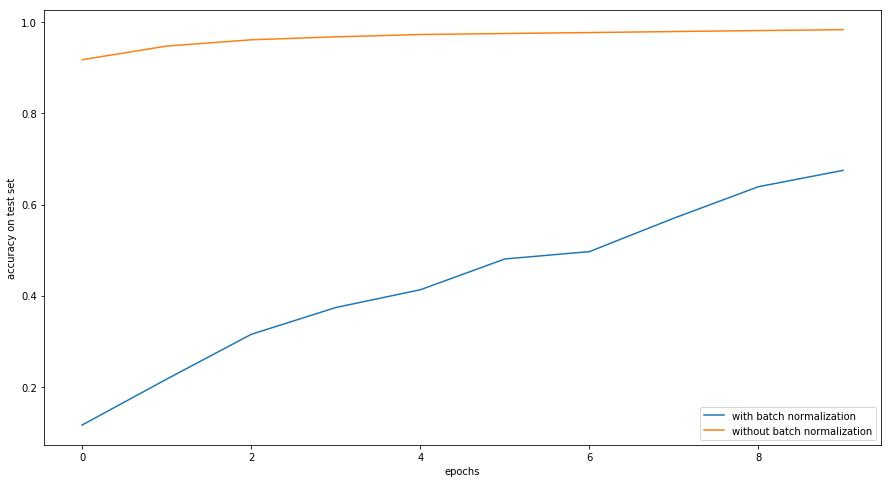

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(history_1.history['val_acc'],label='with batch normalization')
plt.plot(history_2.history['val_acc'],label='without batch normalization')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy on test set')
plt.show()

Batch norm needs longer to train, that is why it doesnt achieve good results on only 10 epochs.

# Problem 2

- We trained all the different networks on our own laptoops without GPU. The networks we trained are inspired from the VGG-16 architecture. But due to our lack of computational ressources, we used a simplified version of it (shallower).

- With the same architecture we tried different techniques to see which one would yield the best result (different optimizers and other techniques such as dropout etc).

- All tghe different networks are trained on 15 epochs only. This was first due to our lack of computational ressources, but as we have not very deep networks, 15 epochs were enough to fully train them. 

### architecture

This is the architecture we used, we tried with/without batch normalzation and with/without dropout also.
- Convolution (32, 3x3) with relu activation
- Convolution (32, 3x3) with relu activation
- Maxpooling (2x2) with stride 2
- Convolution (64, 3x3) with relu activation
- Convolution (64, 3x3) with relu activation
- Maxpooling (2x2) with stride 2
- Dense (256) with relu activation
- Dense (256) with relu activation
- Dense (1) with sigmoid activation

## Retrieve images

In [5]:
import urllib
import cPickle as pickle
import gzip
import os
import numpy as np
import zipfile
import scipy.ndimage
import glob
import shutil
import warnings
import matplotlib.image as mpimg
warnings.filterwarnings("ignore")

final_size = 64
train_dir = 'train_64x64'
validation_dir = 'valid_64x64'
savedir = 'images/'

train_file_list = glob.glob(os.path.join(
        savedir,
        'PetImages',
        '*', '*.jpg'))
train_proc_data = os.path.join(savedir, train_dir)
valid_proc_data = os.path.join(savedir, validation_dir)

print ("Some files may not open. This is fine.")
for in_pic_path in train_file_list:
    filename = \
        '.'.join(os.path.normpath(in_pic_path).split(os.path.sep)[-2:])
    out_pic_path = os.path.join(train_proc_data, filename)
    try:
        #img = mpimg.imread(in_pic_path)
        img = scipy.ndimage.imread(in_pic_path)
        side_dim = min(img.shape[0], img.shape[1])
        start_height = (img.shape[0] - side_dim) // 2
        start_width = (img.shape[1] - side_dim) // 2
        img = img[start_height: start_height + side_dim,
                  start_width: start_width + side_dim]

        img = scipy.misc.imresize(
            img,
            size=(final_size, final_size),
            interp='bilinear'
        )

        if len(img.shape) == 3 and img.shape[2] > 3:
            img = img[:, :, 3]

        assert(img.shape[0] == final_size and
               img.shape[1] == final_size)
        scipy.misc.imsave(out_pic_path, img)
    except IOError:
        print ("Could not open", out_pic_path)
for pic_path in glob.glob(os.path.join(savedir, train_dir,
                                              '*.1????.jpg')):
    split_path = os.path.normpath(pic_path).split(os.path.sep)
    split_path[-2] = validation_dir
    out_path = os.path.join(*split_path)
    shutil.move(pic_path, out_path)

Some files may not open. This is fine.
Could not open images/train_64x64/Cat.666.jpg
Could not open images/train_64x64/Dog.11702.jpg


## From images to tensors 

In [2]:
import os
import numpy as np
import scipy

train_path = 'images/train_64x64/'
test_path = 'images/valid_64x64/'


X = []
y_train = []


for i in range(len(os.listdir(train_path))):
    image = scipy.misc.imread(train_path+os.listdir(train_path)[i])
    if len(image.shape) == 3 : 
        X += [image]
        if 'Cat' in os.listdir(train_path)[i]:
            y_train.append(0)
        else:
            y_train.append(1)

x_train = np.zeros((len(X),64,64,3))
for i in range(len(X)):
    x_train[i,:,:,:] = X[i]

p = np.random.permutation(x_train.shape[0])
x_train = x_train[p,:,:,:]
y_train = np.asarray(y_train)[p]




X = []
y_test = []
for i in range(len(os.listdir(test_path))):
    image = scipy.misc.imread(test_path+os.listdir(test_path)[i])
    if len(image.shape) == 3 : 
        X += [image]
        if 'Cat' in os.listdir(test_path)[i]:
            y_test.append(0)
        else:
            y_test.append(1)

x_test = np.zeros((len(X),64,64,3))
for i in range(len(X)):
    x_test[i,:,:,:] = X[i]

p = np.random.permutation(x_test.shape[0])
x_test = x_test[p,:,:,:]
y_test = np.asarray(y_test)[p]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


## Optimizers

For each optimizer, we did a quick hyper-parameter search for the learning rate.

### SGD

In [19]:
learning_rate = 1e-3
epochs = 15
batch_size = 64
loss = 'binary_crossentropy'

input_shape = x_train.shape[1:]

optimizer = SGD(lr=learning_rate)
    
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape=input_shape))
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))
    

model.compile(loss = loss,
              optimizer = optimizer,
              metrics=['accuracy'])


history_SGD = model.fit(x_train,y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         shuffle=True,
                         validation_split=0.2,
                         verbose=1)

Train on 15980 samples, validate on 3996 samples
Epoch 1/15
15980/15980 [==============================] - 255s 16ms/step - loss: 0.9199 - acc: 0.5268 - val_loss: 0.6807 - val_acc: 0.5603
Epoch 2/15
15980/15980 [==============================] - 257s 16ms/step - loss: 0.6851 - acc: 0.5581 - val_loss: 0.6645 - val_acc: 0.5993
Epoch 3/15
15980/15980 [==============================] - 257s 16ms/step - loss: 0.6759 - acc: 0.5767 - val_loss: 0.6600 - val_acc: 0.5988
Epoch 4/15
15980/15980 [==============================] - 227s 14ms/step - loss: 0.6622 - acc: 0.6032 - val_loss: 0.6431 - val_acc: 0.6396
Epoch 5/15
15980/15980 [==============================] - 227s 14ms/step - loss: 0.6548 - acc: 0.6130 - val_loss: 0.6339 - val_acc: 0.6416
Epoch 6/15
15980/15980 [==============================] - 317s 20ms/step - loss: 0.6455 - acc: 0.6171 - val_loss: 0.6201 - val_acc: 0.6589
Epoch 7/15
15980/15980 [==============================] - 461s 29ms/step - loss: 0.6405 - acc: 0.6292 - val_loss: 0.6

### SGD with momentum

In [42]:
learning_rate = 1e-3
epochs = 15
batch_size = 64
loss = 'binary_crossentropy'

optimizer = SGD(lr=learning_rate, momentum=0.7)
    
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape=input_shape))
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))
    

model.compile(loss = loss,
              optimizer = optimizer,
              metrics=['accuracy'])


history_SGD_momentum = model.fit(x_train,y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         shuffle=True,
                         validation_split=0.2,
                         verbose=1)

Train on 15980 samples, validate on 3996 samples
Epoch 1/15
15980/15980 [==============================] - 255s 16ms/step - loss: 0.9185 - acc: 0.5211 - val_loss: 0.6773 - val_acc: 0.5793
Epoch 2/15
15980/15980 [==============================] - 252s 16ms/step - loss: 0.6813 - acc: 0.5527 - val_loss: 0.6643 - val_acc: 0.5873
Epoch 3/15
15980/15980 [==============================] - 261s 16ms/step - loss: 0.6673 - acc: 0.5913 - val_loss: 0.6479 - val_acc: 0.6394
Epoch 4/15
15980/15980 [==============================] - 248s 16ms/step - loss: 0.6499 - acc: 0.6162 - val_loss: 0.6189 - val_acc: 0.6737
Epoch 5/15
15980/15980 [==============================] - 254s 16ms/step - loss: 0.6317 - acc: 0.6407 - val_loss: 0.6089 - val_acc: 0.6717
Epoch 6/15
15980/15980 [==============================] - 246s 15ms/step - loss: 0.6167 - acc: 0.6573 - val_loss: 0.5811 - val_acc: 0.7020
Epoch 7/15
15980/15980 [==============================] - 260s 16ms/step - loss: 0.6008 - acc: 0.6740 - val_loss: 0.5

### RMSprop

In [25]:
lr = 1e-4
epochs = 15
batch_size = 64
optimizer = RMSprop(lr=lr)
loss = 'binary_crossentropy'


model = Sequential()

input_shape = x_train.shape[1:]

model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape=input_shape))
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = loss,
             optimizer = optimizer,
             metrics=['accuracy'])


history_Dropout = model.fit(x_train,y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     shuffle=True,
                     validation_split=0.2,
                     verbose=1)

Train on 15980 samples, validate on 3996 samples
Epoch 1/15
15980/15980 [==============================] - 250s 16ms/step - loss: 2.6475 - acc: 0.5117 - val_loss: 0.6863 - val_acc: 0.5876
Epoch 2/15
15980/15980 [==============================] - 246s 15ms/step - loss: 0.6947 - acc: 0.5474 - val_loss: 0.6608 - val_acc: 0.6296
Epoch 3/15
15980/15980 [==============================] - 239s 15ms/step - loss: 0.6623 - acc: 0.6040 - val_loss: 0.6365 - val_acc: 0.6714
Epoch 4/15
15980/15980 [==============================] - 243s 15ms/step - loss: 0.6327 - acc: 0.6382 - val_loss: 0.6163 - val_acc: 0.6957
Epoch 5/15
15980/15980 [==============================] - 262s 16ms/step - loss: 0.6137 - acc: 0.6647 - val_loss: 0.5814 - val_acc: 0.7182
Epoch 6/15
15980/15980 [==============================] - 249s 16ms/step - loss: 0.5943 - acc: 0.6864 - val_loss: 0.5677 - val_acc: 0.7217
Epoch 7/15
15980/15980 [==============================] - 249s 16ms/step - loss: 0.5776 - acc: 0.7031 - val_loss: 0.5

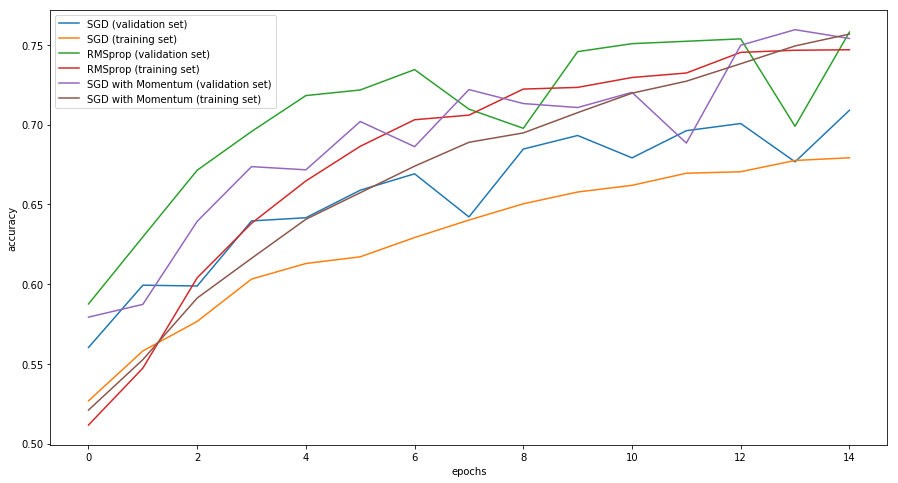

In [55]:
plt.figure(figsize=(15,8))
plt.plot(history_SGD.history['val_acc'], label='SGD (validation set)')
plt.plot(history_SGD.history['acc'], label='SGD (training set)')
plt.plot(history_Dropout.history['val_acc'],label='RMSprop (validation set)')
plt.plot(history_Dropout.history['acc'],label='RMSprop (training set)')
plt.plot(history_SGD_momentum.history['val_acc'],label='SGD with Momentum (validation set)')
plt.plot(history_SGD_momentum.history['acc'],label='SGD with Momentum (training set)')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

- SGD doesn't seem good at all for this problem...
- NB: we also tried Adam optimizer, but it didn't even achieve 50% accuracy ... 

## Early Stopping

In [23]:
lr = 1e-4
epochs = 15
batch_size = 64
optimizer = RMSprop(lr=lr)
loss = 'binary_crossentropy'


model = Sequential()

input_shape = x_train.shape[1:]

model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape=input_shape))
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = loss,
             optimizer = optimizer,
             metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')

history_early_stopping = model.fit(x_train,y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     shuffle=True,
                     validation_split=0.2,
                     verbose=1,
                     callbacks=[early_stopping])

Train on 15980 samples, validate on 3996 samples
Epoch 1/15
15980/15980 [==============================] - 4062s 254ms/step - loss: 1.3988 - acc: 0.5454 - val_loss: 0.6164 - val_acc: 0.6614
Epoch 2/15
15980/15980 [==============================] - 461s 29ms/step - loss: 0.6290 - acc: 0.6484 - val_loss: 0.5708 - val_acc: 0.7185
Epoch 3/15
15980/15980 [==============================] - 465s 29ms/step - loss: 0.5737 - acc: 0.7036 - val_loss: 0.5326 - val_acc: 0.7442
Epoch 4/15
15980/15980 [==============================] - 468s 29ms/step - loss: 0.5239 - acc: 0.7402 - val_loss: 0.5143 - val_acc: 0.7518
Epoch 5/15
15980/15980 [==============================] - 2987s 187ms/step - loss: 0.4735 - acc: 0.7739 - val_loss: 0.5166 - val_acc: 0.7613
Epoch 6/15
15980/15980 [==============================] - 260s 16ms/step - loss: 0.4230 - acc: 0.8073 - val_loss: 0.4968 - val_acc: 0.7673
Epoch 7/15
15980/15980 [==============================] - 253s 16ms/step - loss: 0.3872 - acc: 0.8299 - val_loss:

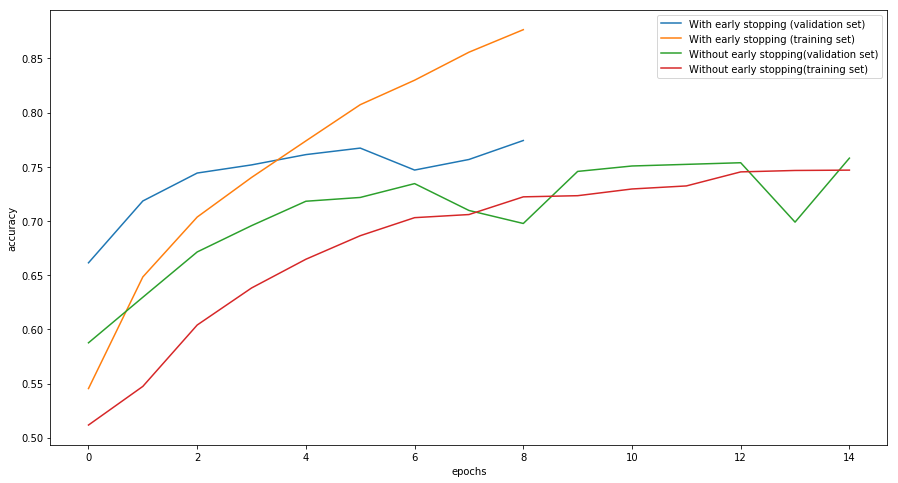

In [53]:
plt.figure(figsize=(15,8))
plt.plot(history_early_stopping.history['val_acc'], label='With early stopping (validation set)')
plt.plot(history_early_stopping.history['acc'], label='With early stopping (training set)')
plt.plot(history_Dropout.history['val_acc'],label='Without early stopping(validation set)')
plt.plot(history_Dropout.history['acc'],label='Without early stopping(training set)')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

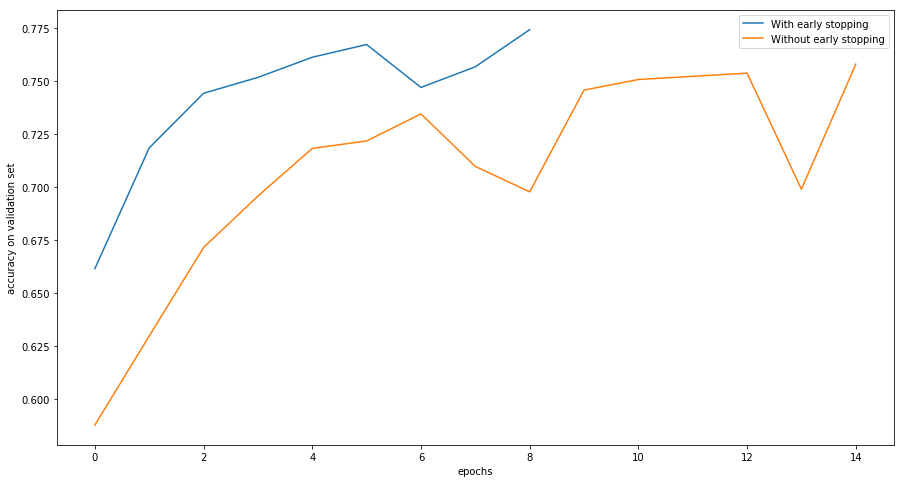

In [54]:
plt.figure(figsize=(15,8))
plt.plot(history_early_stopping.history['val_acc'], label='With early stopping')
plt.plot(history_Dropout.history['val_acc'],label='Without early stopping')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy on validation set')
plt.show()

Early stopping doesn't seem relevant in our case because we only train on 15 epochs, which is very short. Here, early stopping performs better but this is just due to the random initialization of the network, as both have the same architecture...

## Batch Normalization

In [24]:
lr = 1e-4
epochs = 15
batch_size = 64
optimizer = RMSprop(lr=lr)
loss = 'binary_crossentropy'


model = Sequential()

input_shape = x_train.shape[1:]

model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = loss,
             optimizer = optimizer,
             metrics=['accuracy'])


history_BN = model.fit(x_train,y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     shuffle=True,
                     validation_split=0.2,
                     verbose=1)

Train on 15980 samples, validate on 3996 samples
Epoch 1/15
15980/15980 [==============================] - 374s 23ms/step - loss: 0.7709 - acc: 0.6265 - val_loss: 0.5591 - val_acc: 0.7192
Epoch 2/15
15980/15980 [==============================] - 436s 27ms/step - loss: 0.5911 - acc: 0.7074 - val_loss: 0.5162 - val_acc: 0.7518
Epoch 3/15
15980/15980 [==============================] - 422s 26ms/step - loss: 0.4931 - acc: 0.7625 - val_loss: 0.4866 - val_acc: 0.7593
Epoch 4/15
15980/15980 [==============================] - 415s 26ms/step - loss: 0.4123 - acc: 0.8127 - val_loss: 0.4829 - val_acc: 0.7770
Epoch 5/15
15980/15980 [==============================] - 368s 23ms/step - loss: 0.3351 - acc: 0.8549 - val_loss: 0.5004 - val_acc: 0.7765
Epoch 6/15
15980/15980 [==============================] - 717s 45ms/step - loss: 0.2623 - acc: 0.8937 - val_loss: 0.5423 - val_acc: 0.7783
Epoch 7/15
15980/15980 [==============================] - 373s 23ms/step - loss: 0.1981 - acc: 0.9188 - val_loss: 0.5

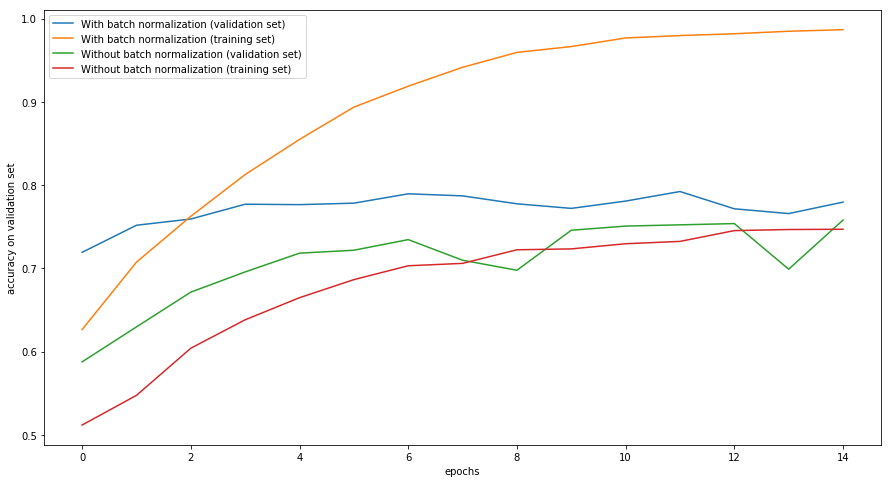

In [51]:
plt.figure(figsize=(15,8))
plt.plot(history_BN.history['val_acc'], label='With batch normalization (validation set)')
plt.plot(history_BN.history['acc'], label='With batch normalization (training set)')
plt.plot(history_Dropout.history['val_acc'],label='Without batch normalization (validation set)')
plt.plot(history_Dropout.history['acc'],label='Without batch normalization (training set)')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

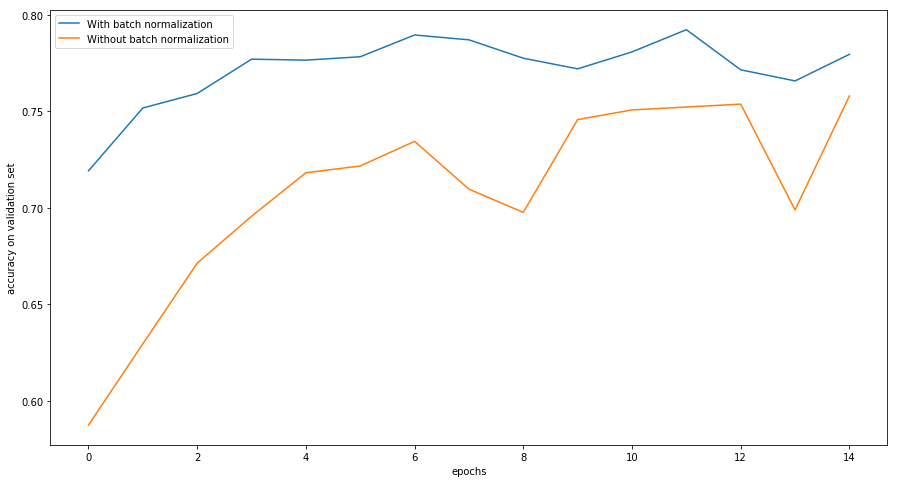

In [52]:
plt.figure(figsize=(15,8))
plt.plot(history_BN.history['val_acc'], label='With batch normalization')
plt.plot(history_Dropout.history['val_acc'],label='Without batch normalization')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy on validation set')
plt.show()

In the first problem, our CNN with batch normalization was training slower than without and performing worse. But the network had only 2 convolutioonal layers. In this case, the network has 4 convolutional and 2 more fully connected layers at the end. Batch normalization becomes more effective with a deeper network as shown by these results. 

## Regularizers

### Dropout

In [38]:
lr = 1e-4
epochs = 15
batch_size = 64
optimizer = RMSprop(lr=lr)
loss = 'binary_crossentropy'


model = Sequential()

input_shape = x_train.shape[1:]

model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape=input_shape))
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = loss,
             optimizer = optimizer,
             metrics=['accuracy'])


history_Without_Dropout = model.fit(x_train,y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     shuffle=True,
                     validation_split=0.2,
                     verbose=1)

Train on 15980 samples, validate on 3996 samples
Epoch 1/15
15980/15980 [==============================] - 242s 15ms/step - loss: 2.4720 - acc: 0.5374 - val_loss: 0.6198 - val_acc: 0.6562
Epoch 2/15
15980/15980 [==============================] - 270s 17ms/step - loss: 0.6418 - acc: 0.6349 - val_loss: 0.5919 - val_acc: 0.6764
Epoch 3/15
15980/15980 [==============================] - 244s 15ms/step - loss: 0.5878 - acc: 0.6904 - val_loss: 0.5632 - val_acc: 0.7130
Epoch 4/15
15980/15980 [==============================] - 248s 16ms/step - loss: 0.5473 - acc: 0.7247 - val_loss: 0.5331 - val_acc: 0.7377
Epoch 5/15
15980/15980 [==============================] - 230s 14ms/step - loss: 0.5076 - acc: 0.7561 - val_loss: 0.5406 - val_acc: 0.7387
Epoch 6/15
15980/15980 [==============================] - 232s 15ms/step - loss: 0.4678 - acc: 0.7823 - val_loss: 0.5055 - val_acc: 0.7588
Epoch 7/15
15980/15980 [==============================] - 422s 26ms/step - loss: 0.4389 - acc: 0.8022 - val_loss: 0.5

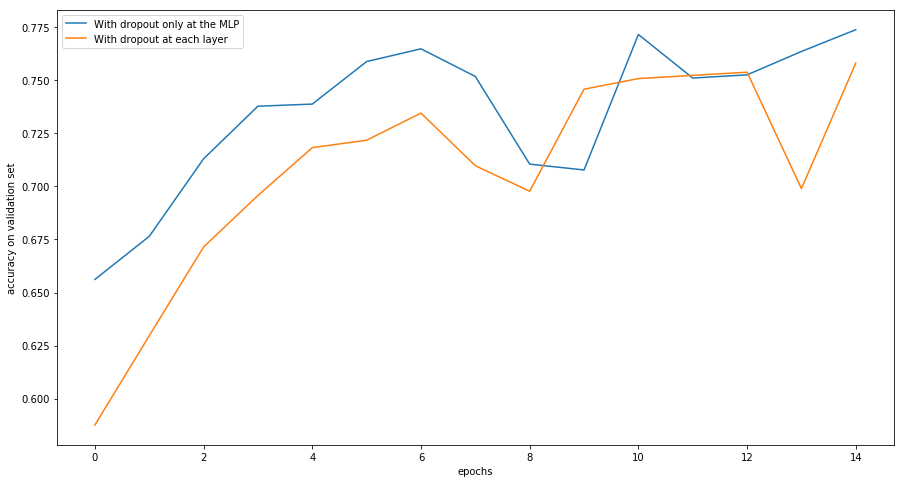

In [40]:
plt.figure(figsize=(15,8))
plt.plot(history_Without_Dropout.history['val_acc'], label='With dropout only at the MLP')
plt.plot(history_Dropout.history['val_acc'],label='With dropout at each layer')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy on validation set')
plt.show()

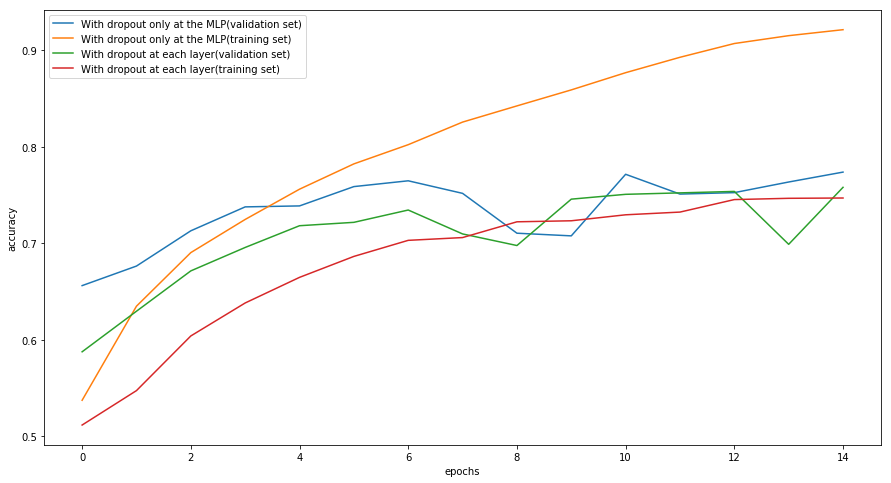

In [56]:
plt.figure(figsize=(15,8))
plt.plot(history_Without_Dropout.history['val_acc'], label='With dropout only at the MLP(validation set)')
plt.plot(history_Without_Dropout.history['acc'], label='With dropout only at the MLP(training set)')
plt.plot(history_Dropout.history['val_acc'],label='With dropout at each layer(validation set)')
plt.plot(history_Dropout.history['acc'],label='With dropout at each layer(training set)')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### Recap graph

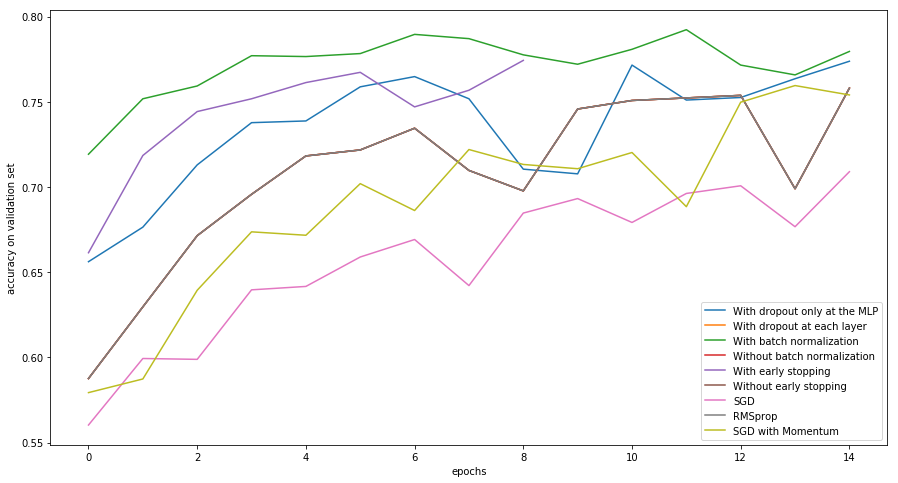

In [44]:
plt.figure(figsize=(15,8))
plt.plot(history_Without_Dropout.history['val_acc'], label='With dropout only at the MLP')
plt.plot(history_Dropout.history['val_acc'],label='With dropout at each layer')
plt.plot(history_BN.history['val_acc'], label='With batch normalization')
plt.plot(history_Dropout.history['val_acc'],label='Without batch normalization')
plt.plot(history_early_stopping.history['val_acc'], label='With early stopping')
plt.plot(history_Dropout.history['val_acc'],label='Without early stopping')
plt.plot(history_SGD.history['val_acc'], label='SGD')
plt.plot(history_Dropout.history['val_acc'],label='RMSprop')
plt.plot(history_SGD_momentum.history['val_acc'],label='SGD with Momentum')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy on validation set')
plt.show()

## Final model

In [3]:
lr = 1e-4
epochs = 15
batch_size = 64
optimizer = RMSprop(lr=lr)
loss = 'binary_crossentropy'


model_final = Sequential()

input_shape = x_train.shape[1:]

model_final.add(BatchNormalization(input_shape=input_shape))
model_final.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model_final.add(BatchNormalization())
model_final.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model_final.add(MaxPooling2D(pool_size=(2, 2)))
model_final.add(Dropout(0.5))

model_final.add(BatchNormalization())
model_final.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model_final.add(BatchNormalization())
model_final.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model_final.add(Dropout(0.5))

model_final.add(BatchNormalization())
model_final.add(Flatten())
model_final.add(Dense(256, activation = 'relu'))
model_final.add(Dropout(0.5))

model_final.add(Dense(256, activation = 'relu'))
model_final.add(Dropout(0.5))

model_final.add(Dense(1, activation = 'sigmoid'))

model_final.compile(loss = loss,
             optimizer = optimizer,
             metrics=['accuracy'])


history_final = model_final.fit(x_trxain,y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     shuffle=True,
                     validation_split=0.2,
                     verbose=1)

Train on 15980 samples, validate on 3996 samples
Epoch 1/15
15980/15980 [==============================] - 457s 29ms/step - loss: 0.8027 - acc: 0.5820 - val_loss: 0.6966 - val_acc: 0.5398
Epoch 2/15
15980/15980 [==============================] - 451s 28ms/step - loss: 0.6686 - acc: 0.6196 - val_loss: 0.6316 - val_acc: 0.6354
Epoch 3/15
15980/15980 [==============================] - 451s 28ms/step - loss: 0.6268 - acc: 0.6601 - val_loss: 0.5982 - val_acc: 0.7110
Epoch 4/15
15980/15980 [==============================] - 445s 28ms/step - loss: 0.5976 - acc: 0.6810 - val_loss: 0.6086 - val_acc: 0.7145
Epoch 5/15
15980/15980 [==============================] - 444s 28ms/step - loss: 0.5858 - acc: 0.6956 - val_loss: 0.6834 - val_acc: 0.7375
Epoch 6/15
15980/15980 [==============================] - 458s 29ms/step - loss: 0.5615 - acc: 0.7118 - val_loss: 1.0901 - val_acc: 0.7442
Epoch 7/15
15980/15980 [==============================] - 455s 28ms/step - loss: 0.5505 - acc: 0.7242 - val_loss: 1.2

## Analysis

In [58]:
result = model_final.predict(x_test)

In [71]:
bad = []
confused = []

for i in range(len(result)):
    if np.absolute((result[i]-y_test[i])[0]) > 0.99:
        bad+=[i]
    if  0.49 < result[i] < 0.51:
        confused+=[i]

In [150]:
print('there are '+str(len(bad))+' images very badly misclassified (99% sure of the wrong class).')
print('there are '+str(len(confused))+' images for which the network is very unsure (49-51%)')

there are 929 images very badly misclassified (99% sure of the wrong class).
there are 7 images for which the network is very unsure (49-51%)


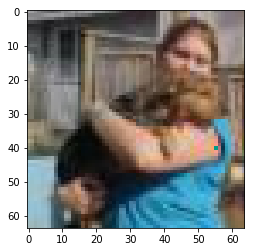

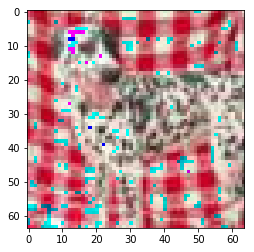

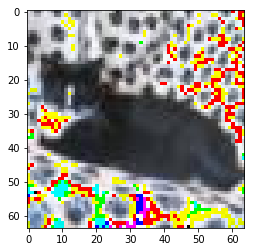

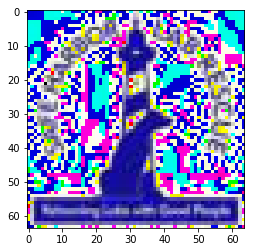

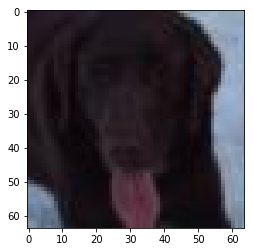

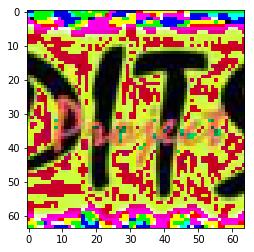

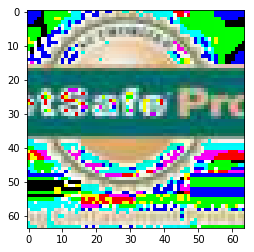

In [78]:
for i in range(len(confused)):
    #we don't know why but our images are saved as their negative
    plt.imshow(255-x_test[confused[i]])
    plt.show()

some of these images doesn't event show a cat or a dog, and most of them are kind of corrupted ...

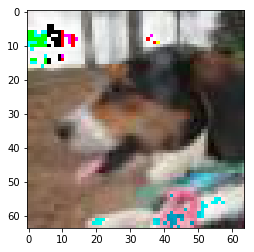

from data, labelled as a dog


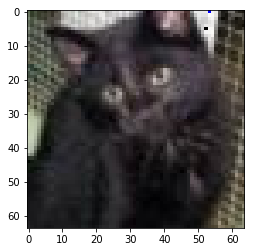

from data, labelled as a cat


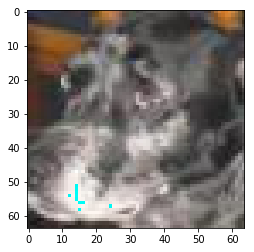

from data, labelled as a dog


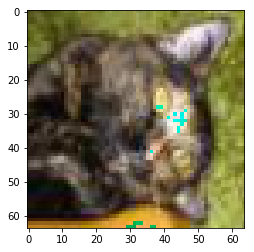

from data, labelled as a cat


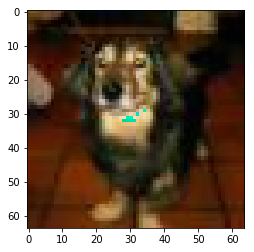

from data, labelled as a dog


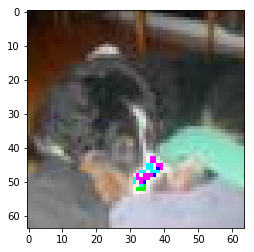

from data, labelled as a dog


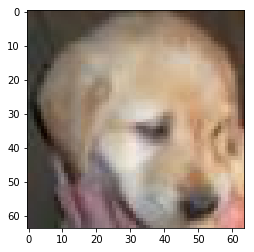

from data, labelled as a dog


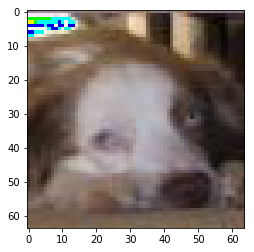

from data, labelled as a dog


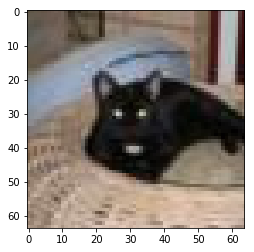

from data, labelled as a cat


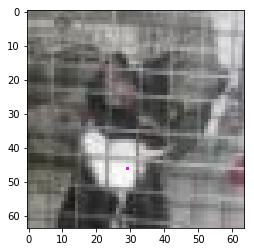

from data, labelled as a cat


In [87]:
n=10
labels = {}
labels[0] = 'cat'
labels[1] = 'dog'
for i in range(10*n,10*(n+1)):
    plt.imshow(255-x_test[bad[i]])
    plt.show()
    print('from data, labelled as a '+labels[y_test[bad[i]]])

NB: we printed the original label each time to make sure they were correctly labeled ( to make sure that our network was really making a wrong prediction).

In [96]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2081  823]
 [ 416 1670]]


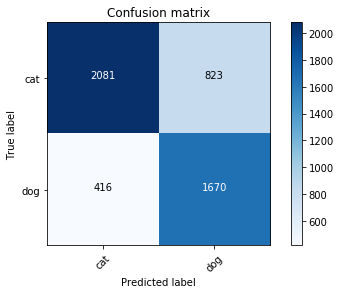

In [97]:
from sklearn.metrics import confusion_matrix
y_pred = []
for i in range(len(result)):
    if result[i] > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

cnf_matrix = confusion_matrix(y_pred, y_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, ['cat', 'dog'],
                      title='Confusion matrix')
plt.show()

The network seems to have more trouble classifying dogs correctly.

## feature maps

In [137]:
optimizer = RMSprop(lr=lr)
loss = 'binary_crossentropy'


model_representation1 = Sequential()

input_shape = x_train.shape[1:]

model_representation1.add(BatchNormalization(input_shape=input_shape))
model_representation1.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model_representation1.add(BatchNormalization())
model_representation1.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
#model_representation1.add(MaxPooling2D(pool_size=(2, 2)))

for i in range(len(model_representation1.layers)):
    model_representation1.layers[i].set_weights(model_final.layers[i].get_weights())

model_representation1.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr = lr),
              metrics=['accuracy'])

In [140]:
optimizer = RMSprop(lr=lr)
loss = 'binary_crossentropy'


model_representation2 = Sequential()

input_shape = x_train.shape[1:]

model_representation2.add(BatchNormalization(input_shape=input_shape))
model_representation2.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model_representation2.add(BatchNormalization())
model_representation2.add(Conv2D(32, 3, padding = 'same', activation = 'relu'))
model_representation2.add(MaxPooling2D(pool_size=(2, 2)))
model_representation2.add(Dropout(0.5))

model_representation2.add(BatchNormalization())
model_representation2.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model_representation2.add(BatchNormalization())
model_representation2.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
#model_representation2.add(MaxPooling2D(pool_size=(2, 2)))

for i in range(len(model_representation2.layers)-1):
    model_representation2.layers[i].set_weights(model_final.layers[i].get_weights())

model_representation2.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr = lr),
              metrics=['accuracy'])

### feature maps of the first block (after the first 2 convolutional layers)

In [158]:
res1 = model_representation1.predict(x_test[confused[4]:confused[4]+60,:,:,:])

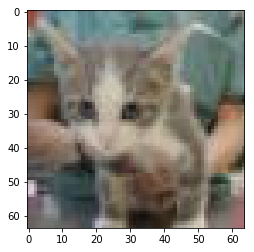

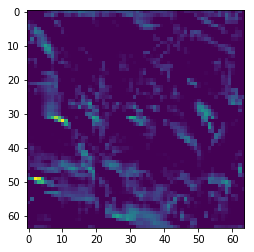

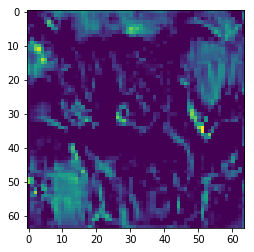

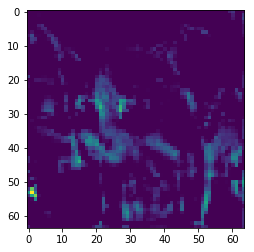

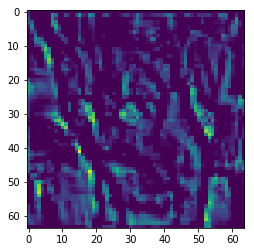

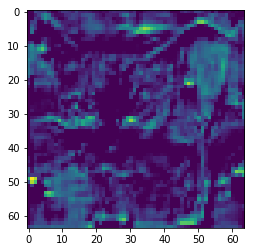

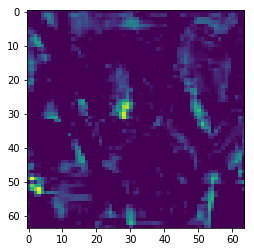

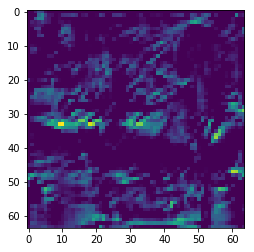

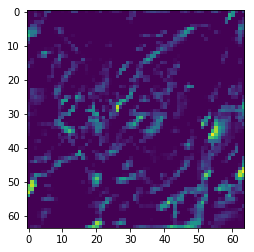

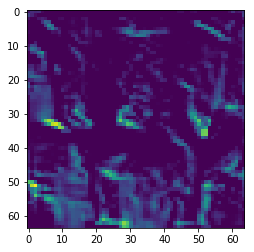

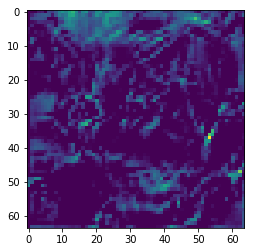

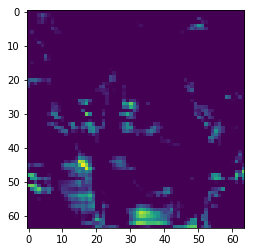

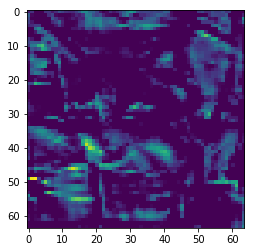

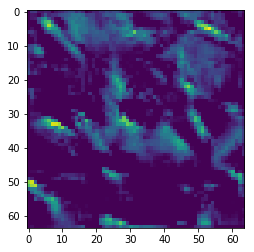

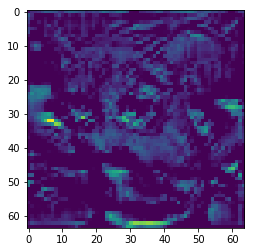

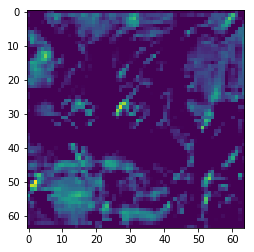

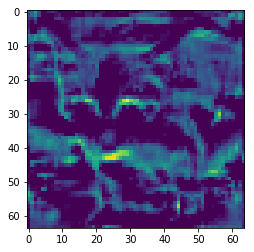

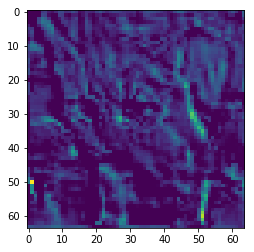

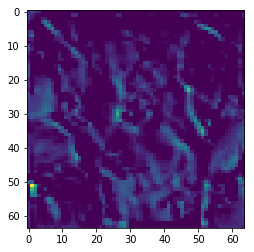

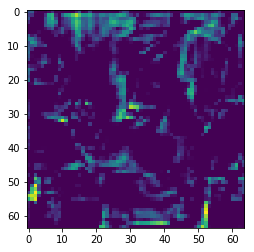

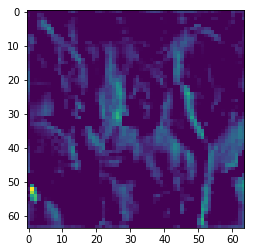

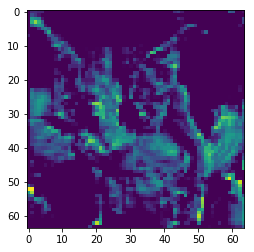

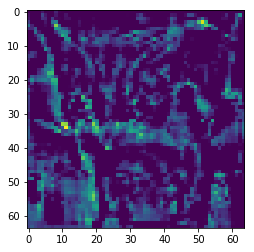

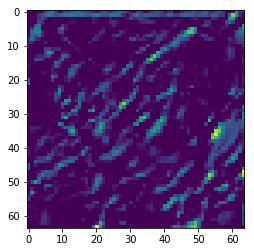

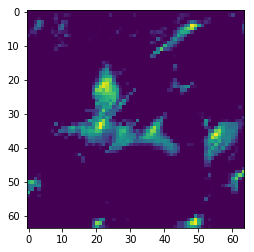

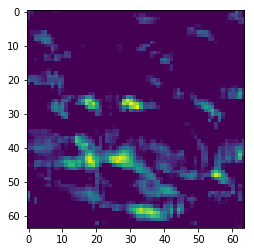

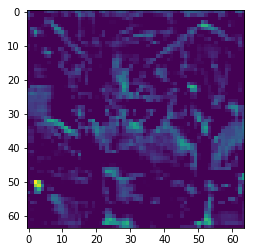

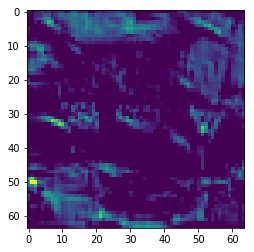

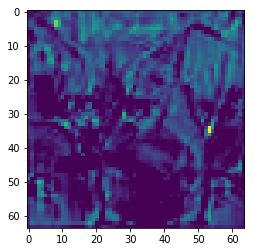

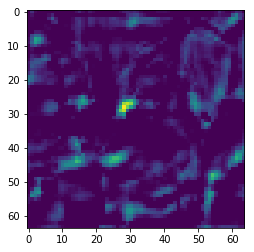

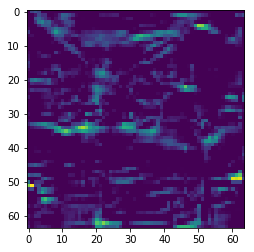

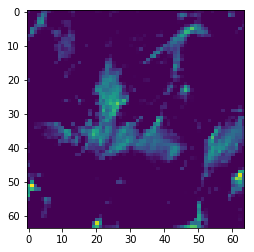

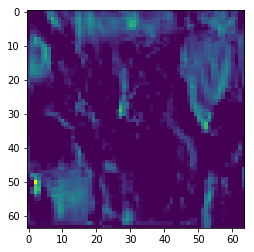

In [162]:
plt.imshow(255-x_test[3478])
plt.show()
for i in range(32):
    plt.imshow(res1[40][:,:,i])
    plt.show()

We can make out roughly some feature maps that react to shapes/edges, and others more to colors. We can still recognize the original image here.

### feature maps of the second block ( output of the convolutional part of the network/learned feature representation)

In [ ]:
res2 = model_representation2.predict(x_test[confused[4]:confused[4]+60,:,:,:])

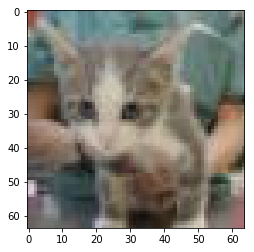

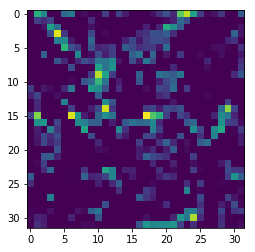

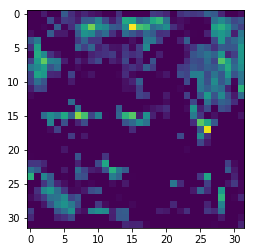

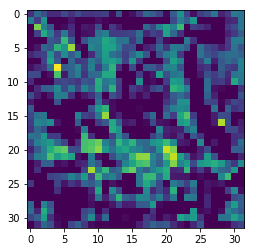

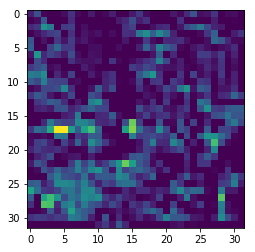

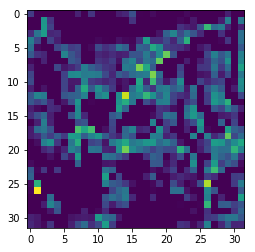

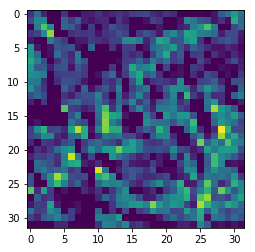

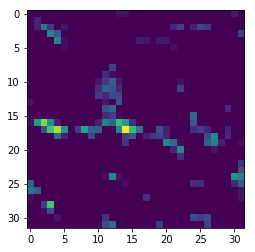

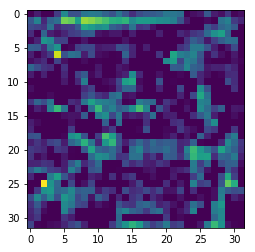

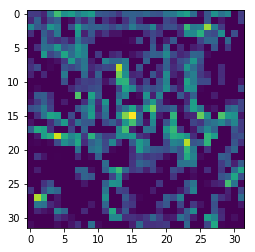

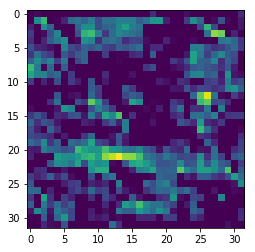

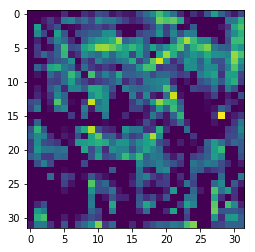

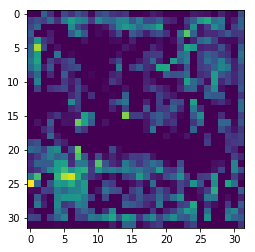

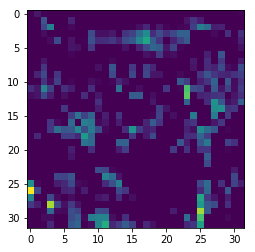

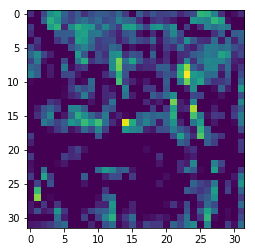

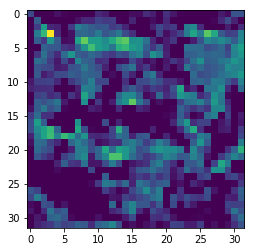

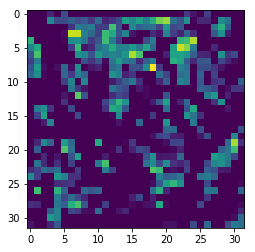

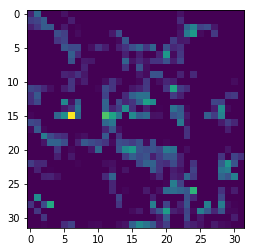

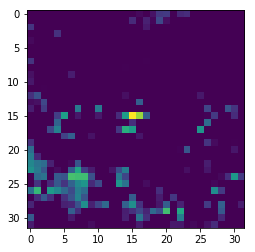

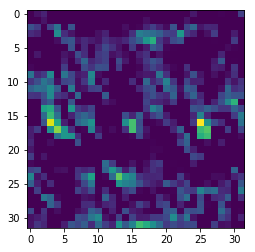

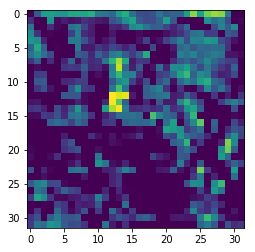

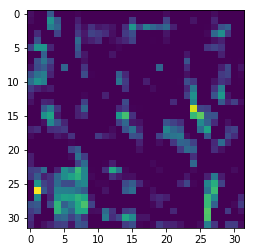

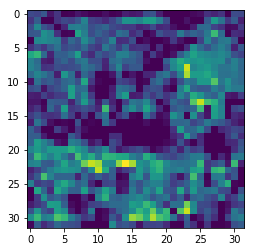

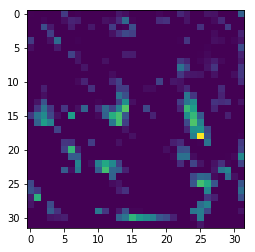

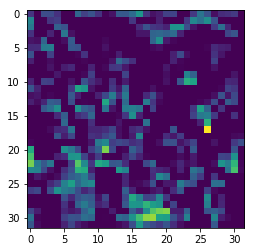

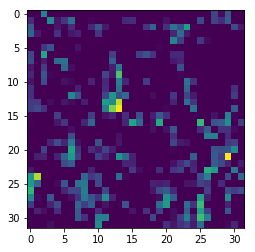

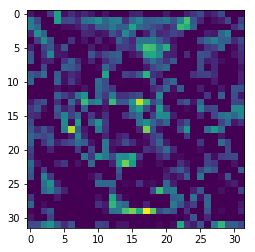

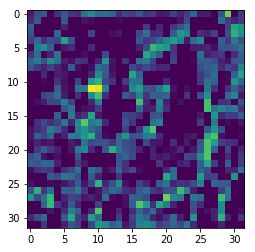

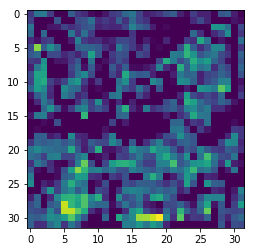

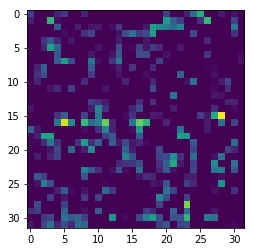

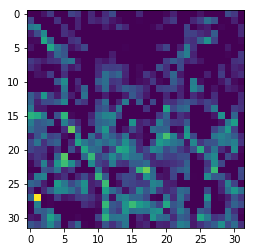

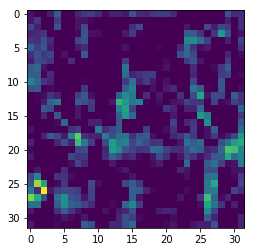

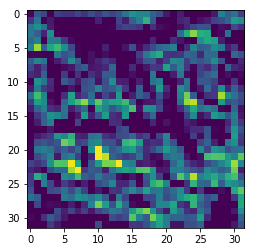

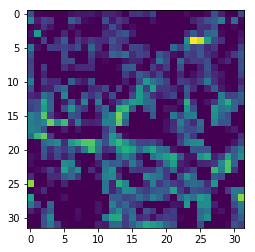

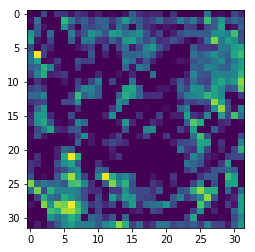

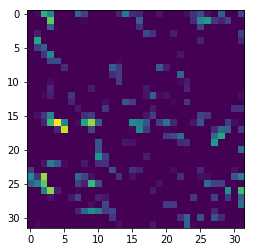

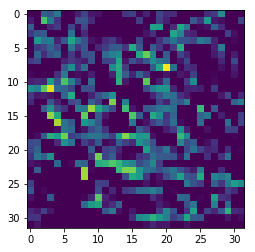

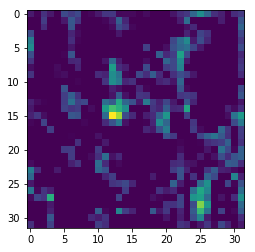

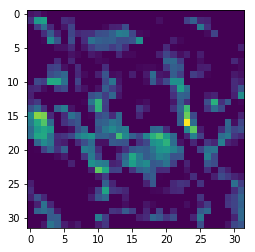

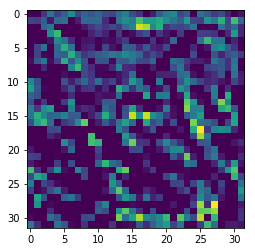

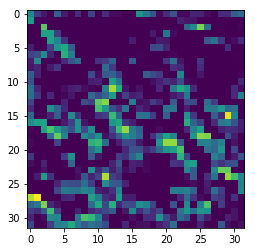

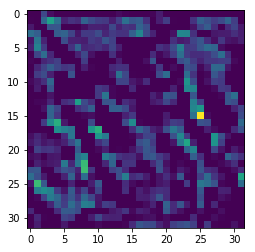

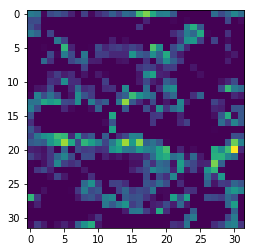

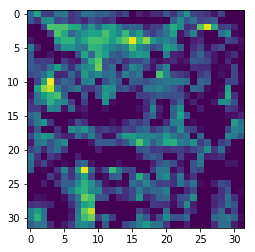

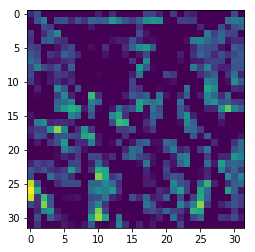

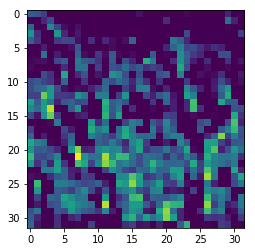

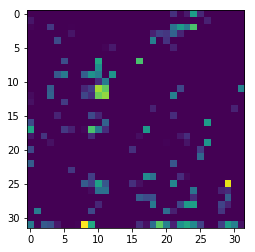

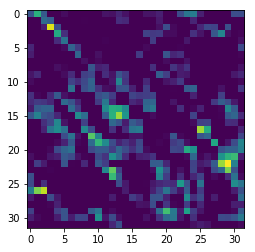

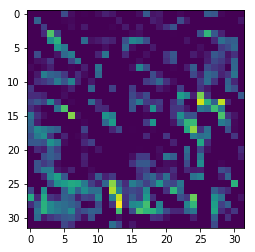

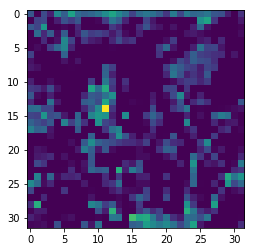

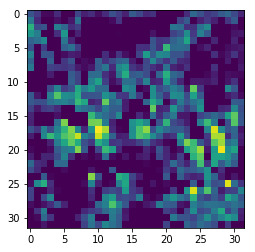

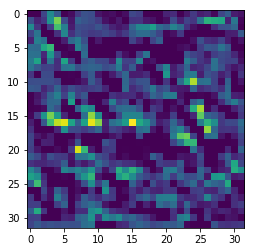

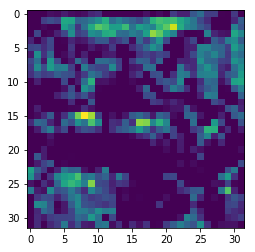

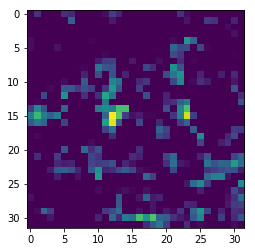

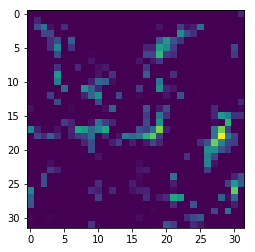

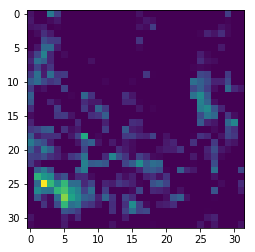

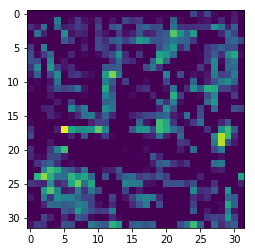

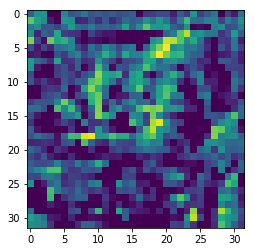

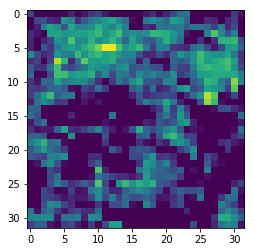

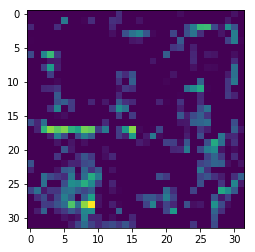

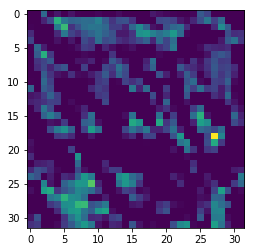

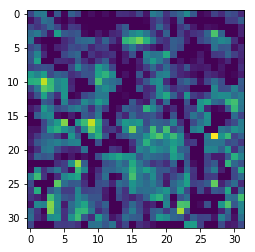

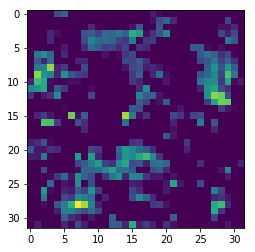

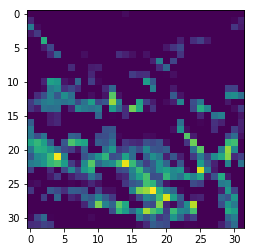

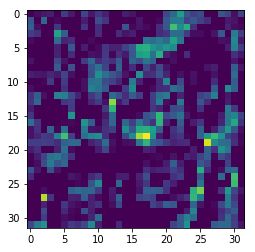

In [164]:
plt.imshow(255-x_test[3478])
plt.show()
for i in range(64):
    plt.imshow(res2[40][:,:,i])
    plt.show()

These feature maps are hard to interprete... The original image is completely unrecognizable also.

### feature maps with an image for which the network was 50% sure.

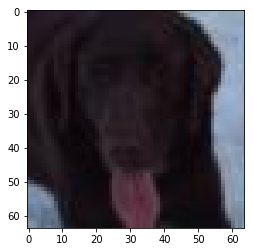

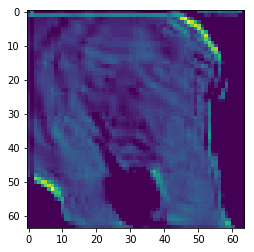

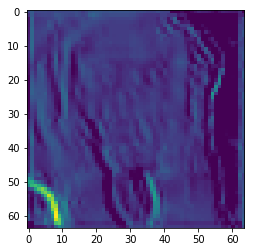

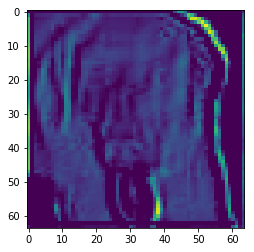

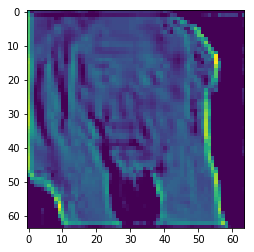

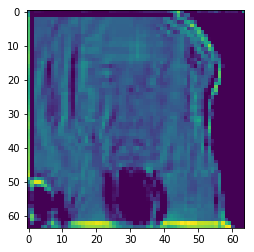

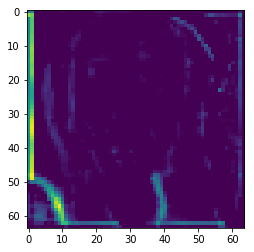

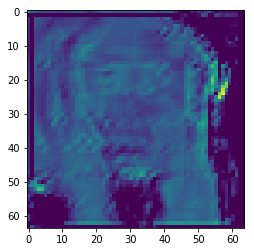

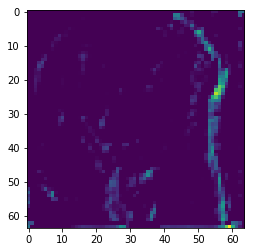

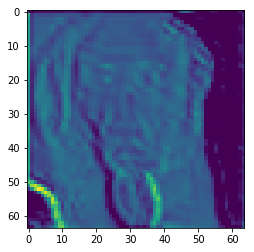

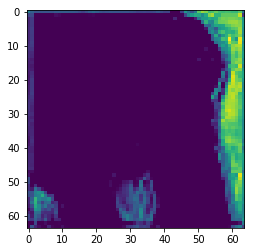

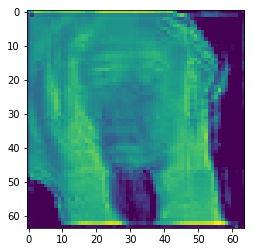

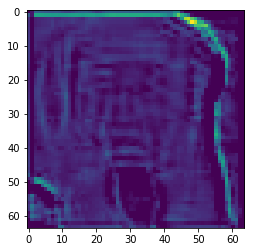

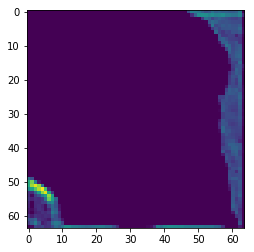

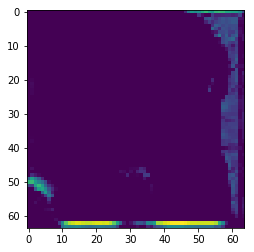

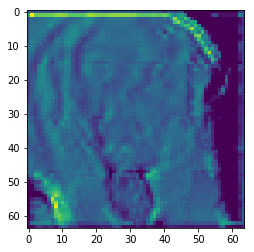

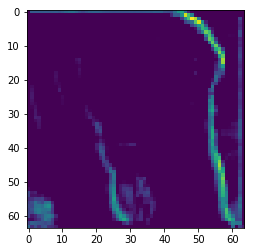

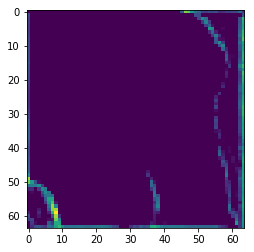

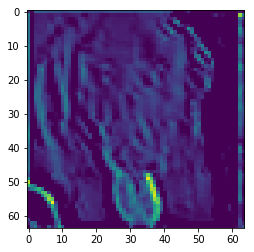

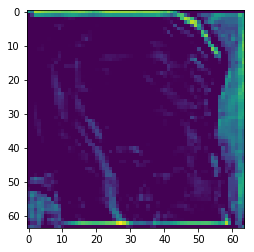

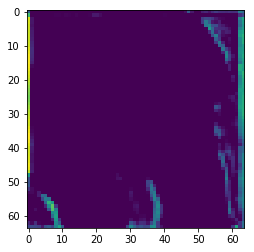

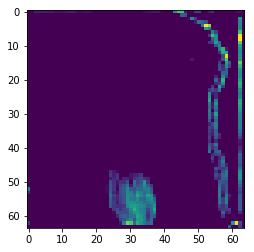

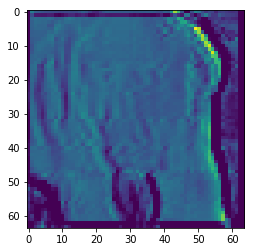

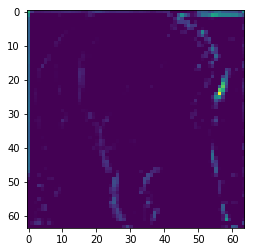

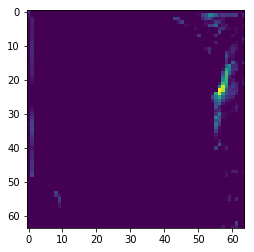

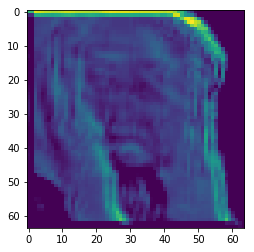

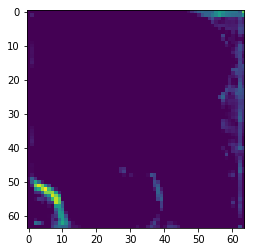

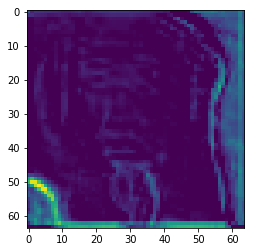

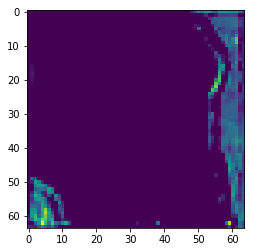

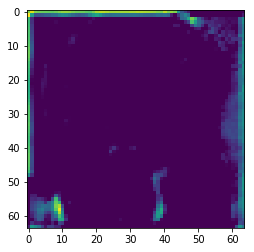

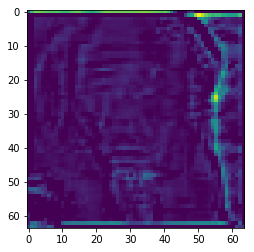

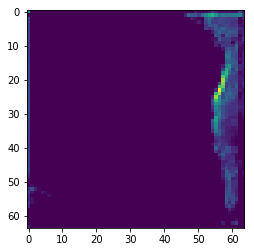

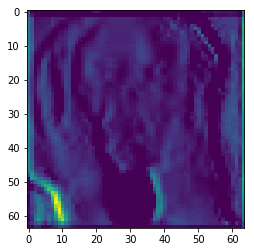

IndexError: index 32 is out of bounds for axis 2 with size 32

In [167]:
plt.imshow(255-x_test[3438])
plt.show()
for i in range(64):
    plt.imshow(res1[0][:,:,i])
    plt.show()

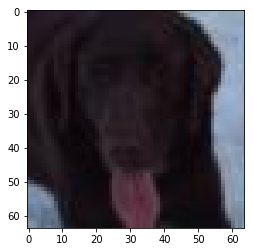

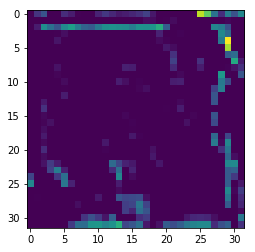

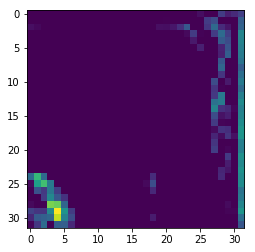

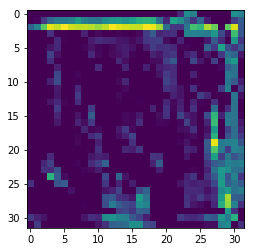

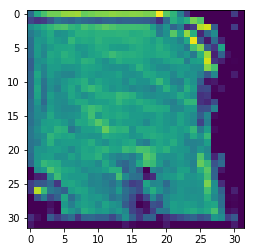

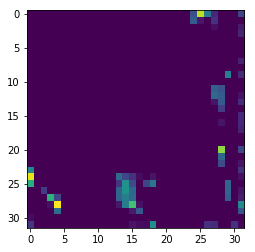

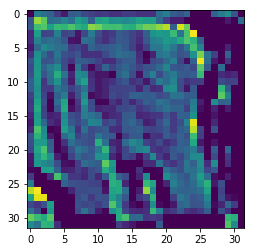

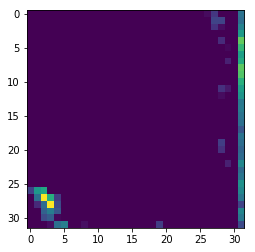

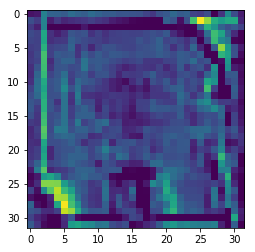

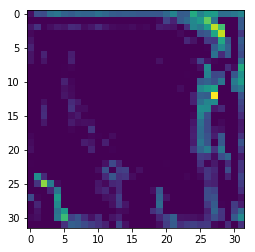

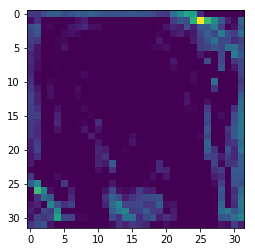

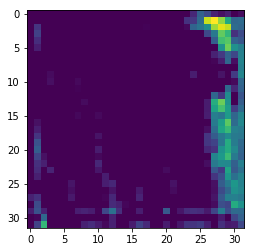

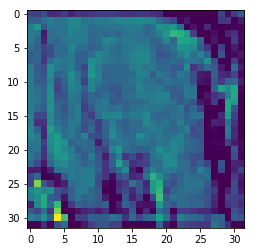

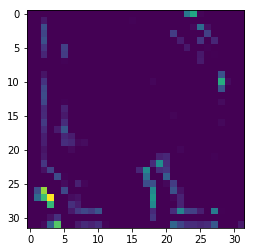

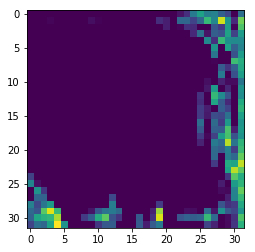

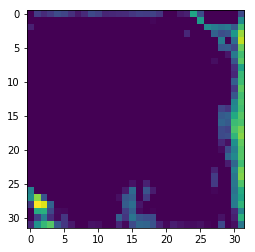

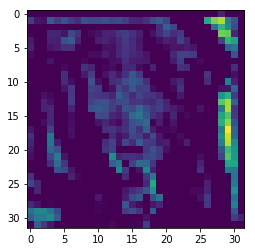

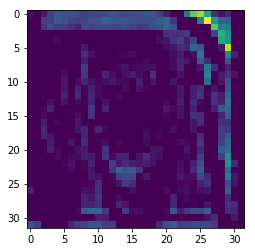

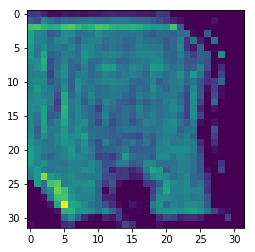

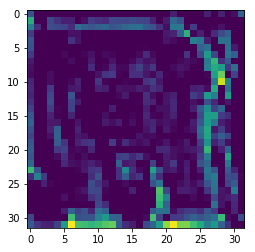

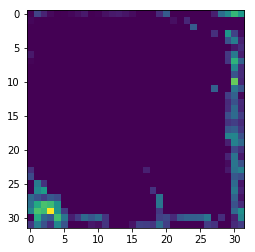

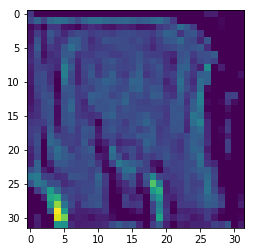

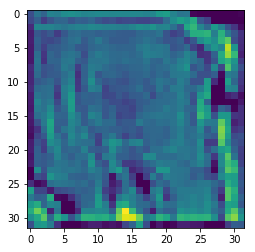

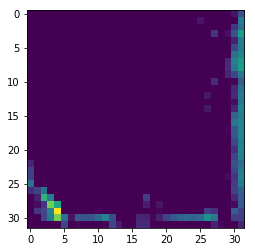

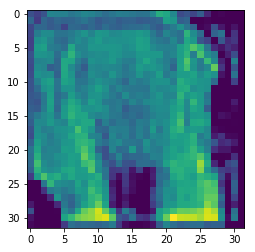

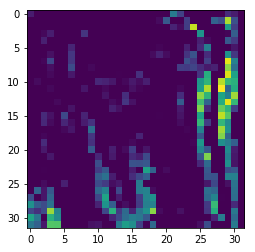

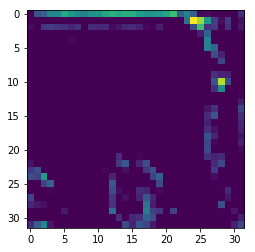

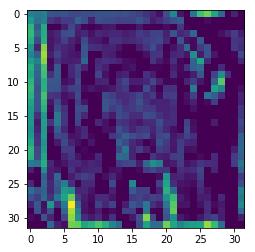

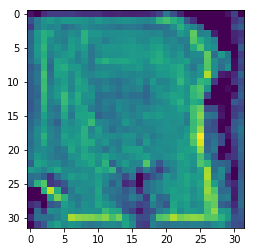

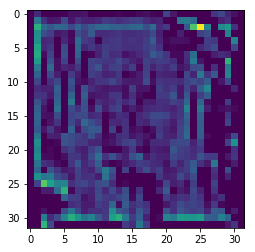

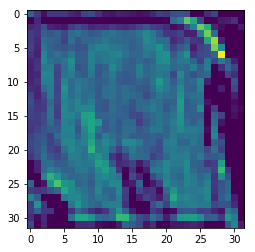

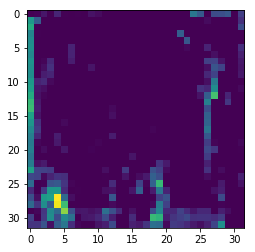

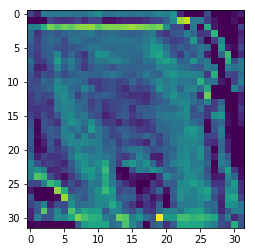

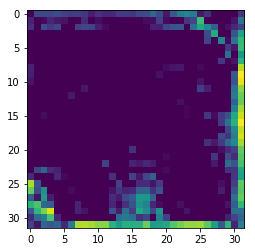

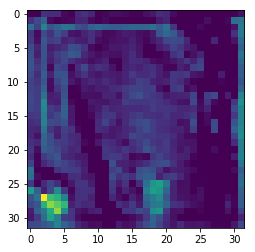

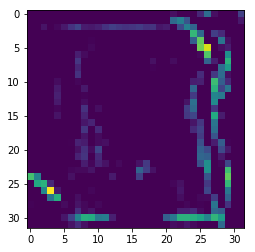

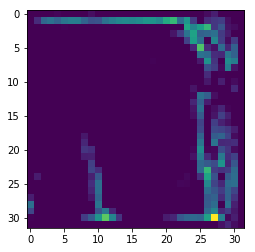

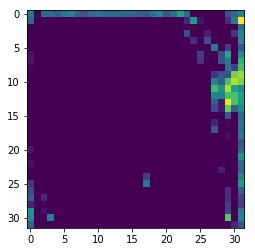

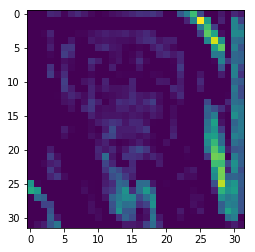

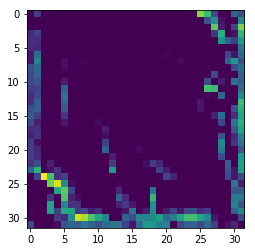

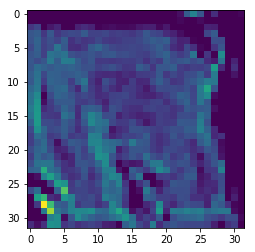

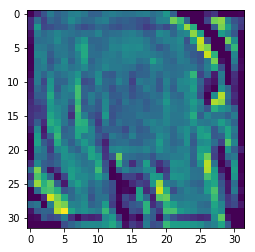

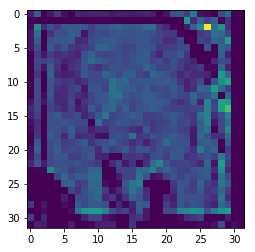

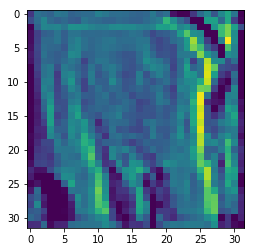

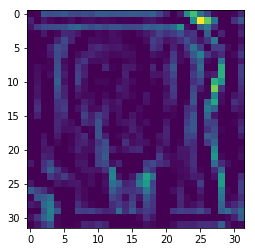

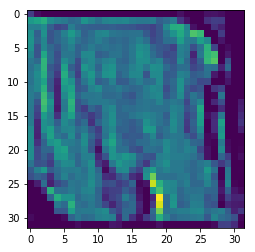

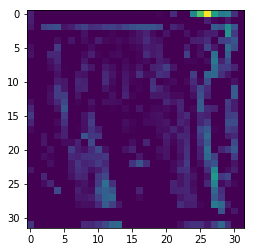

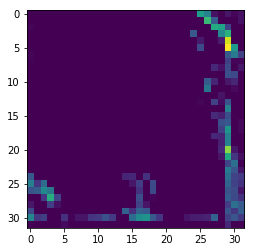

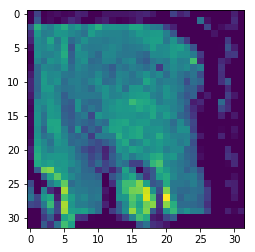

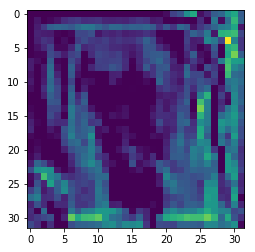

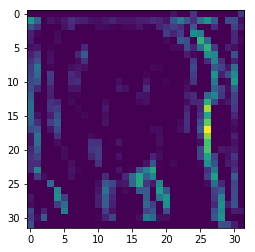

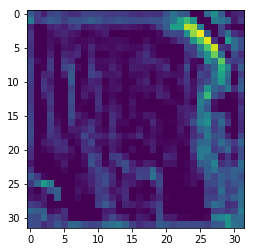

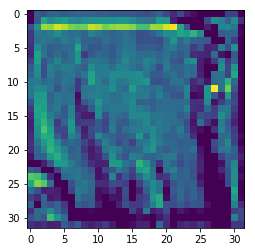

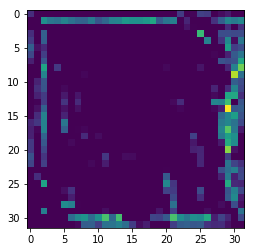

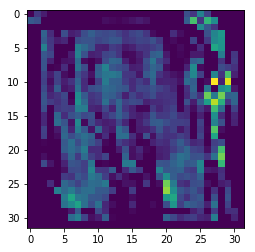

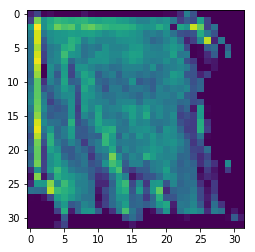

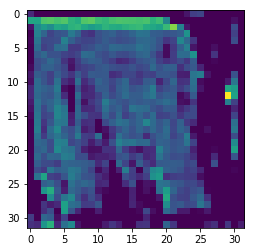

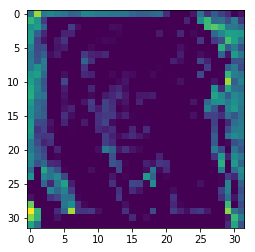

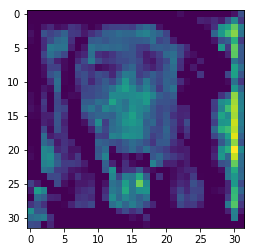

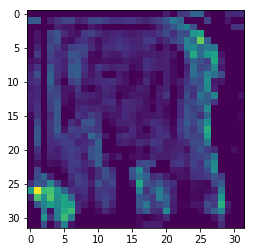

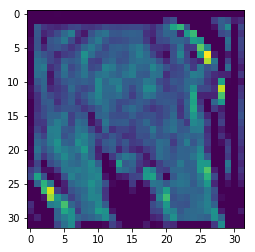

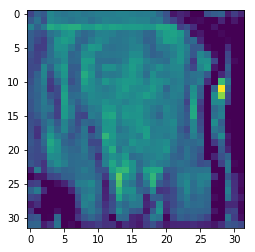

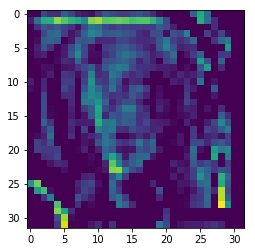

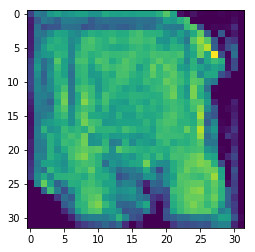

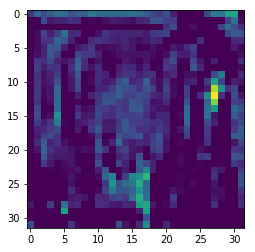

In [168]:
plt.imshow(255-x_test[3438])
plt.show()
for i in range(64):
    plt.imshow(res2[0][:,:,i])
    plt.show()

In [170]:
score_final = model_final.evaluate(x_test,y_test)
print('Test loss:', score_final[0])
print('Test accuracy:', score_final[1])

4990/4990 [==============================] - 40s 8ms/step
Test loss: 2.5616250393624775
Test accuracy: 0.7517034068852961


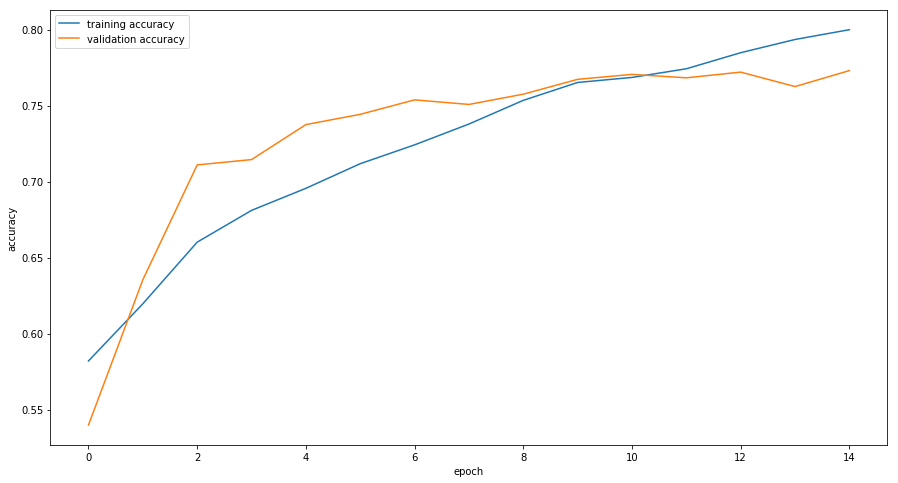

In [171]:
plt.figure(figsize=(15,8))
plt.plot(history_final.history['acc'], label = 'training accuracy')
plt.plot(history_final.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Conclusion

- Batch normalization seems especially efficient to improve the learning rate of the network.
- RMSprop is an efficient optimizer to train the network.
- Dropout also helps, especially when applied to the dense layers.
- Due to our lack of computational ressources, we didn't try to train a very deep architecture. But having a bigger deeper network will definetly enhance the accuracy of the model. 
- Data augmenting techniques can also be applied to impriove performances such as random flipping and random cropping. 
- However with a not too deep network, we still manage to achieve good results (80% accuracy) with a very reasonable training time (2 hours)